## Лабораторная работа 5

In [5]:
# Нужные библиотеки
import cv2
from matplotlib import pyplot as plt
import numpy as np

##### 1. Откройте изображение Morph.jpg. Примените к нему базовые морфологические операции (дилатацию и эрозию) с структурными элементами крест, прямоугольник и эллипс (для каждого из них попробуйте размеры 3x3 и 5х5) и с 1, 3 , 5 итерациями.

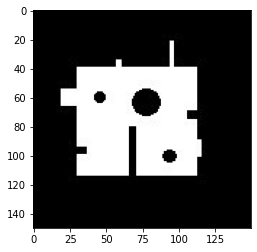

In [6]:
# Получение изображения
img = cv2.imread('lab5/Morph.jpg')
img_copy = img.copy()
plt.imshow(img_copy)
plt.show()

In [7]:
# Трансформация изображений
def draw_transform1(images, title):
    plt.figure(figsize=(16,13), dpi=90)
    plt.subplot2grid((3,3), (0,0))
    plt.imshow(images[0])
    plt.title('Исходное изображение')
    plt.subplot2grid((3,3), (0,1))
    plt.imshow(images[1])
    plt.title(title)
    plt.show()

In [8]:
# Выбор структурного элемента
def structur(type_s, size):
    if type_s == 'cross':
        return cv2.getStructuringElement(cv2.MORPH_CROSS, (size, size))
    elif type_s == 'ellipse':
        return cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size, size))
    elif type_s == 'rect':
        return cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))

### Дилатация

**Увеличивает область изображения, расширяя его пиксели и тем самым способствуя объединению областей изображения, которые были разделены шумом и др.**

In [5]:
# Операция - дилатация
def dilate(image, type):
    sizes = [3, 5]
    iter = [1, 3, 5]
    for i in iter:
        for j in sizes:
            kernel = structur(type, j)
            dilate_img = cv2.morphologyEx(image, cv2.MORPH_DILATE, kernel, iterations=i)
            draw_transform1([image, dilate_img], f'Итерации: {i}, Структурный элемент {type}, Ядро {j}x{j}')
        

Структурный элемент крест

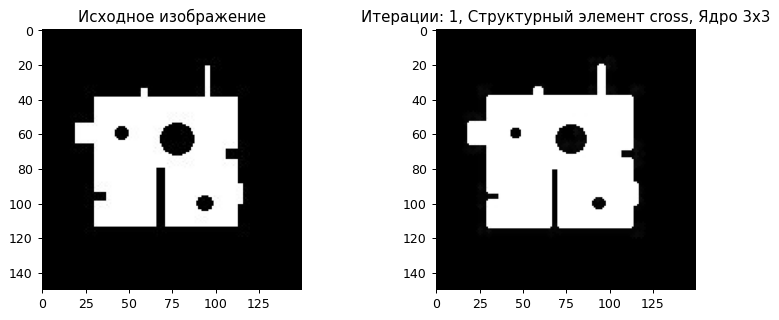

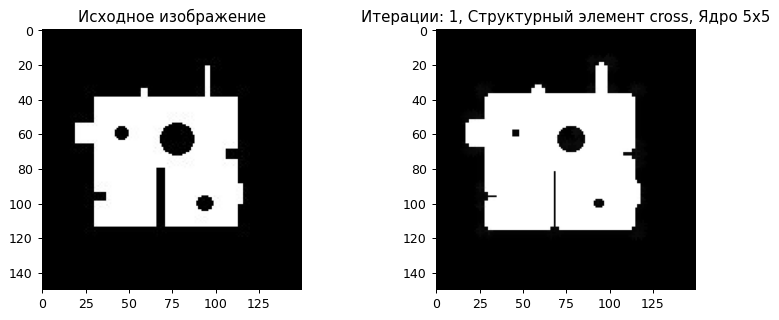

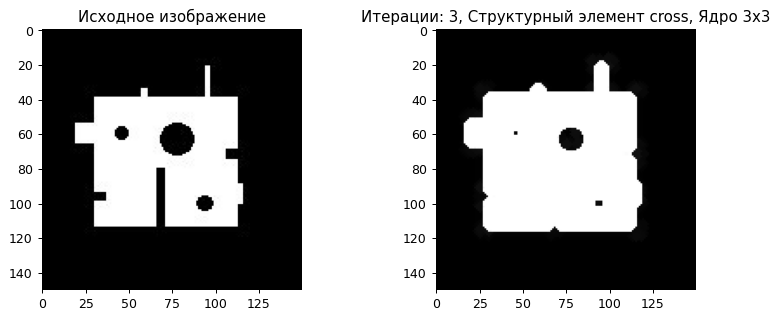

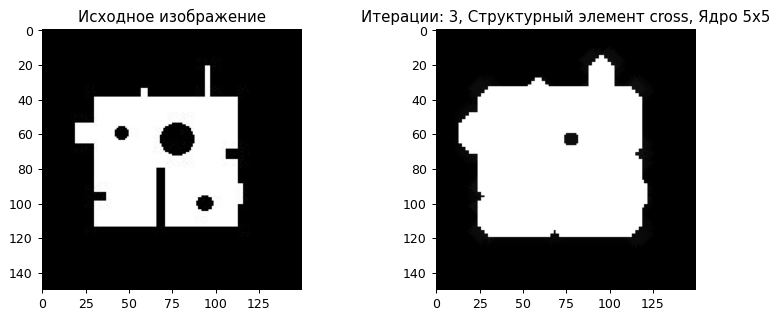

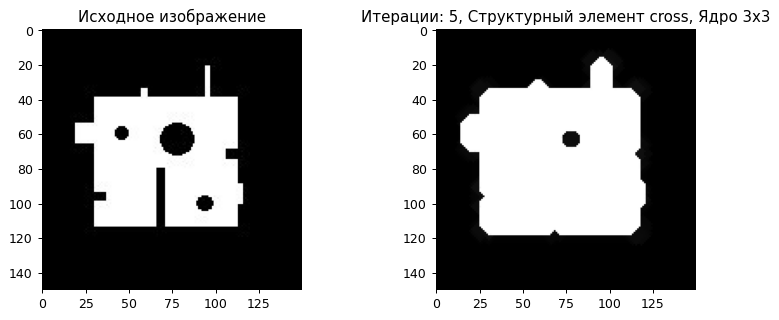

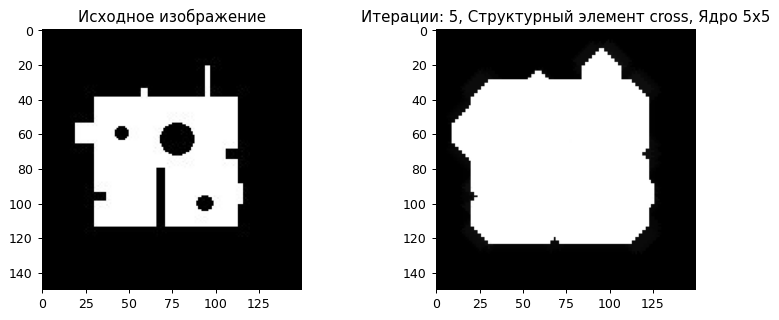

In [6]:
dilate(img_copy, 'cross')

Структурный элемент эллипс

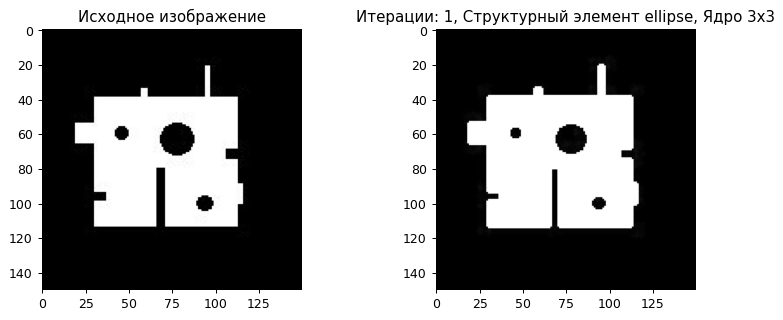

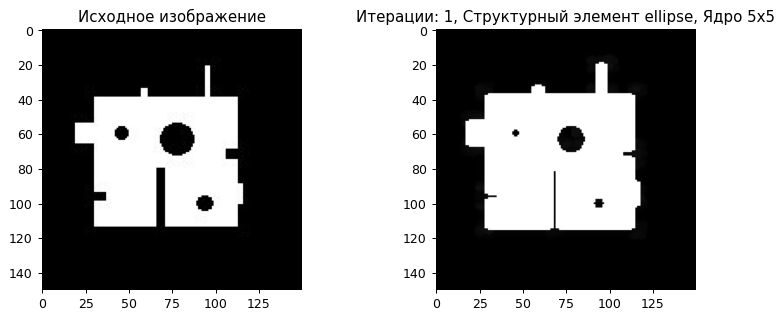

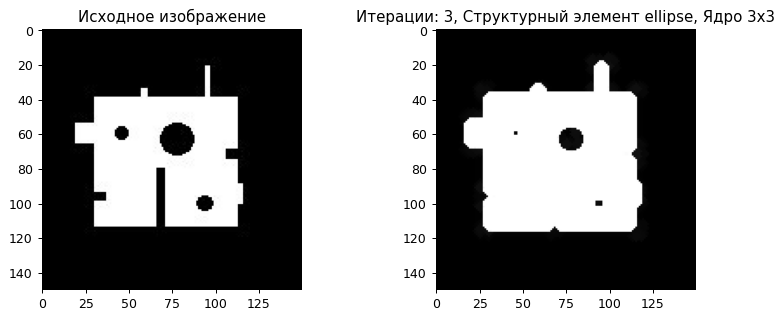

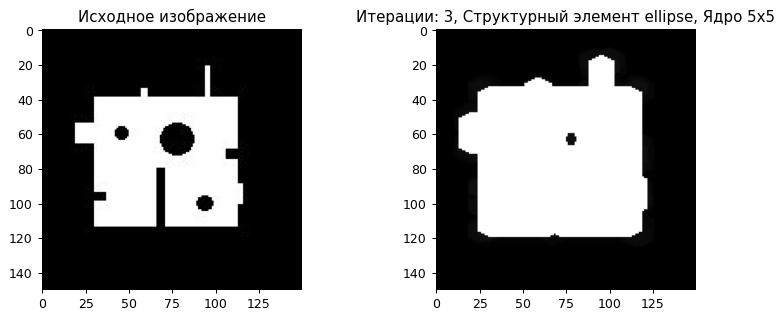

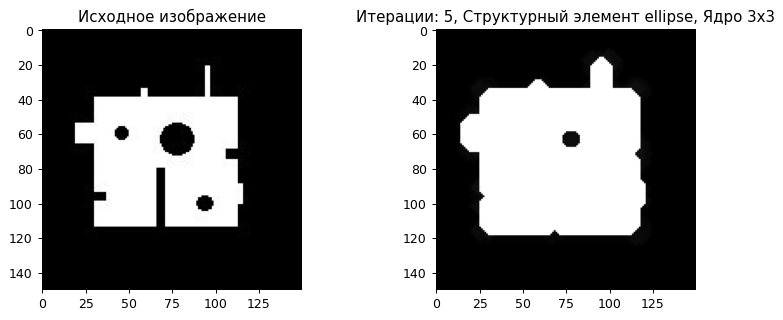

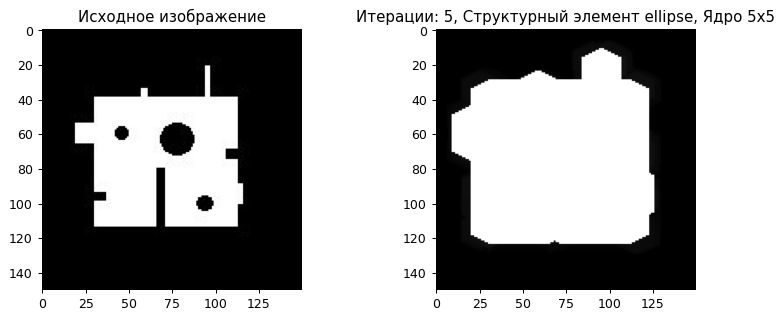

In [7]:
dilate(img_copy, 'ellipse')

Структурный элемент прямоугольник

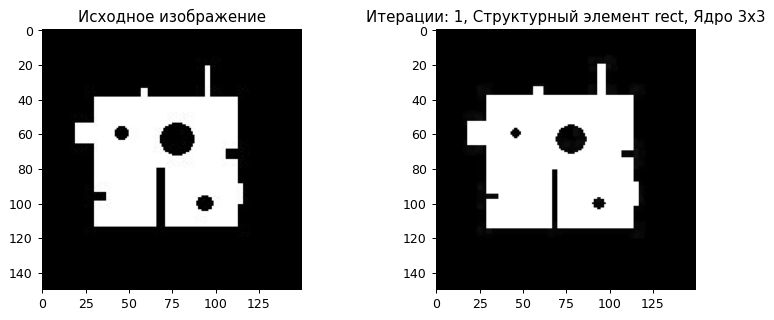

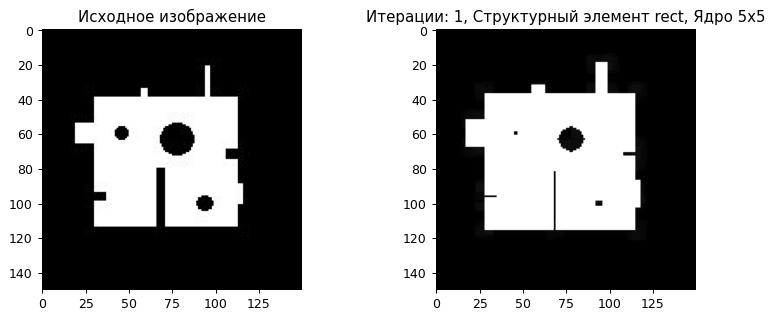

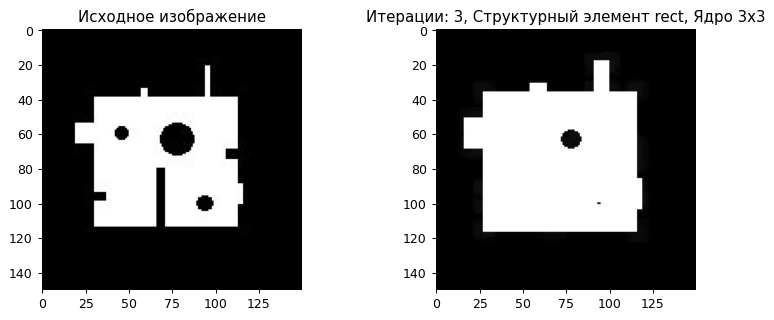

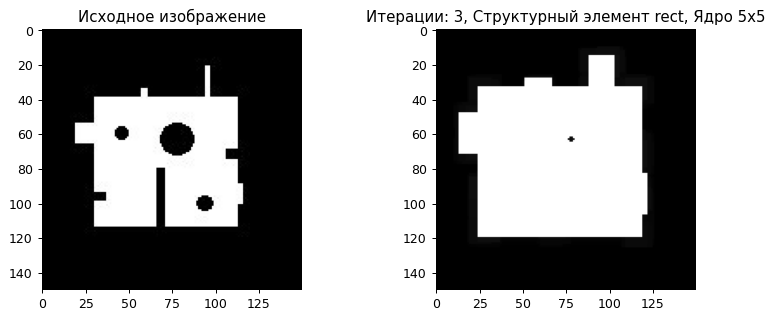

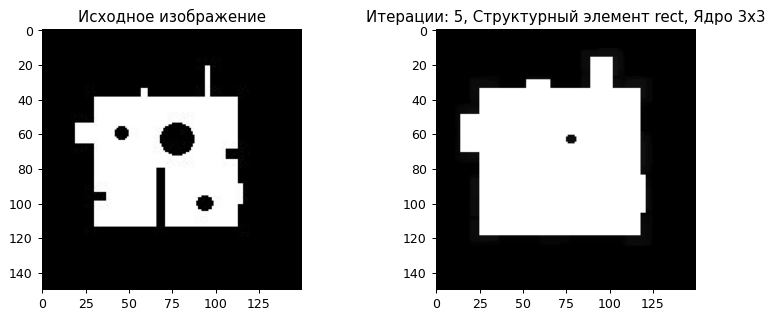

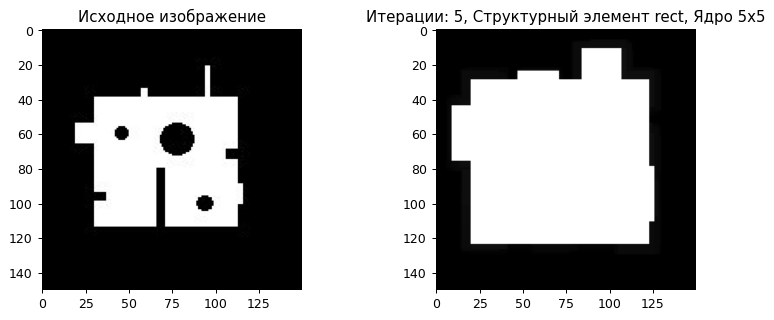

In [8]:
dilate(img_copy, 'rect')

Для этого изображения лучше всего:
* Ядро - 5x5
* Итерации - 5
* Структурный элемент - прямоугольник

### Эрозия

**Уменьшает область изображения, приводя к истончению пикселей, расширяя и усиливая светлые места на изображении.**

In [9]:
# Операция - эрозия
def erode(image, type):
    sizes = [3, 5]
    iter = [1, 3, 5]
    for i in iter:
        for j in sizes:
            kernel = structur(type, j)
            erode_img = cv2.morphologyEx(image, cv2.MORPH_ERODE, kernel, iterations=i)
            draw_transform1([image, erode_img], f'Итерации: {i}, Структурный элемент {type}, Ядро {j}x{j}')

Структурный элемент крест

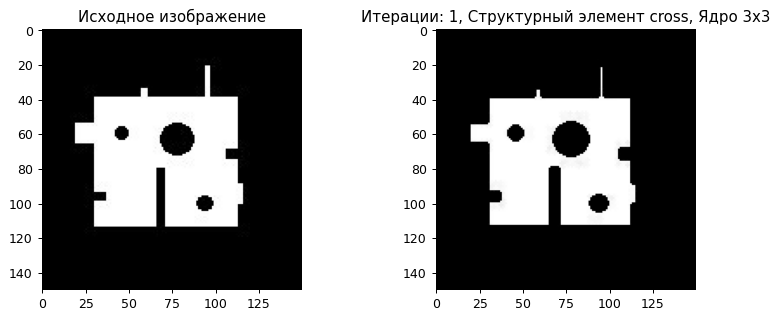

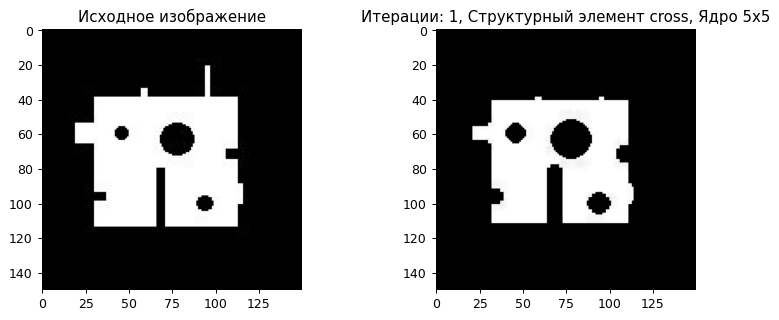

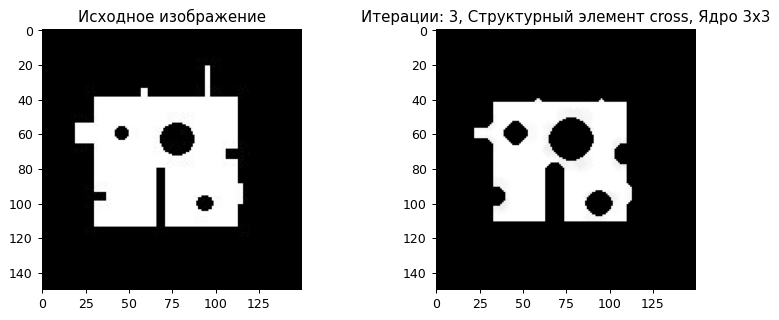

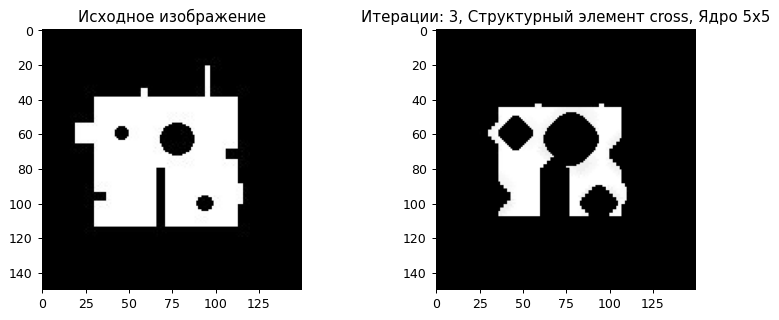

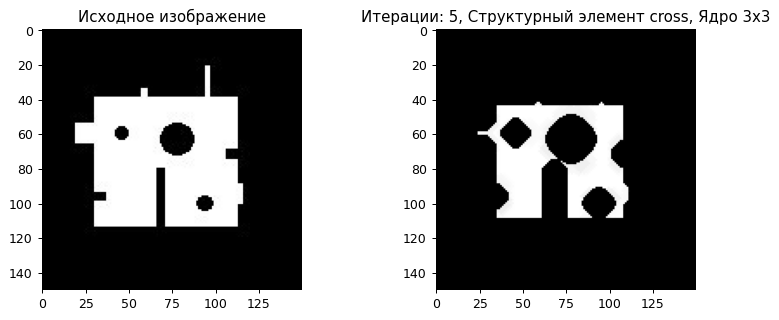

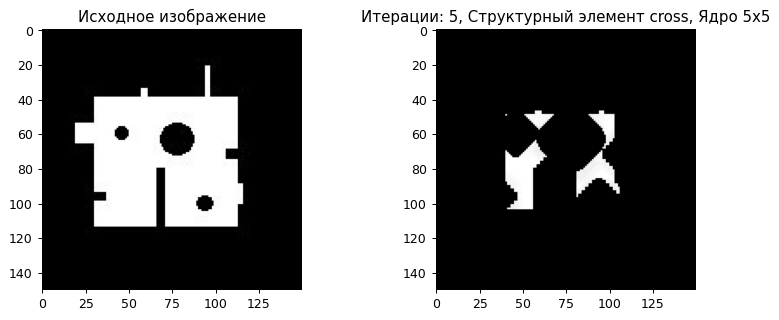

In [10]:
erode(img_copy, 'cross')

Структурный элемент эллипс

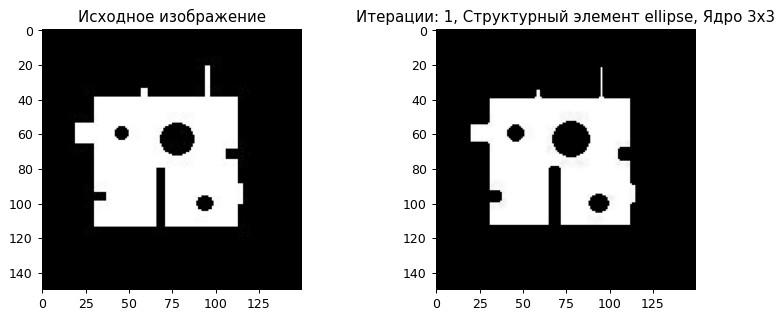

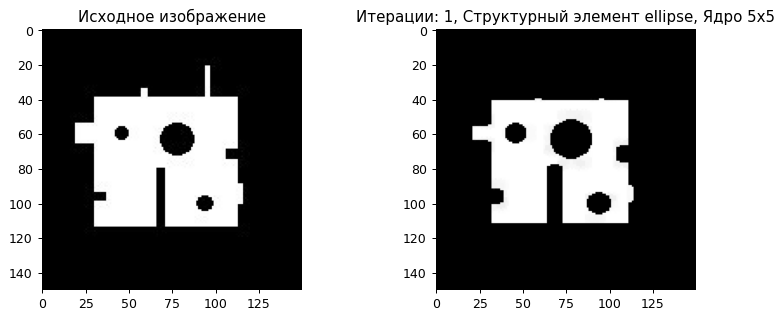

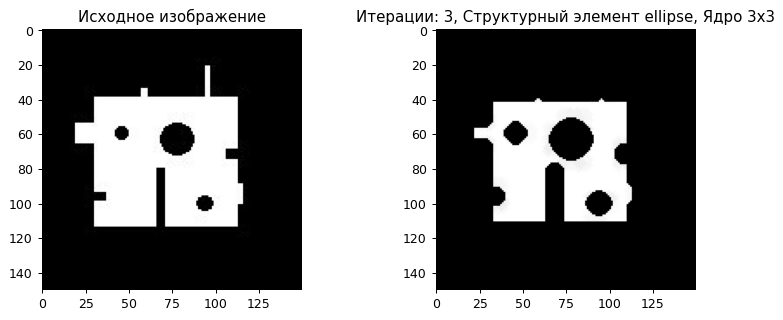

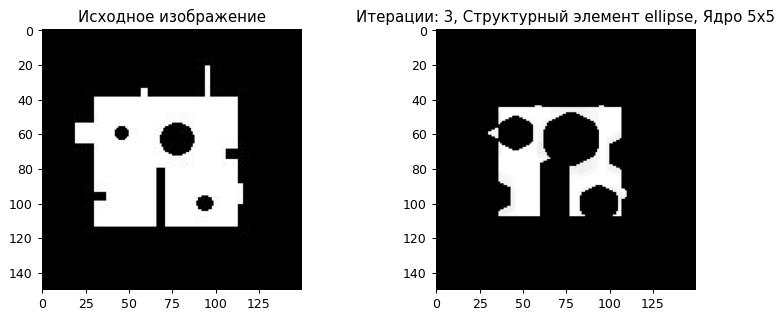

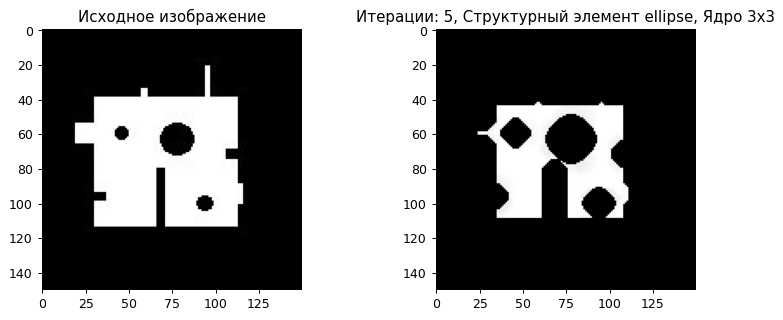

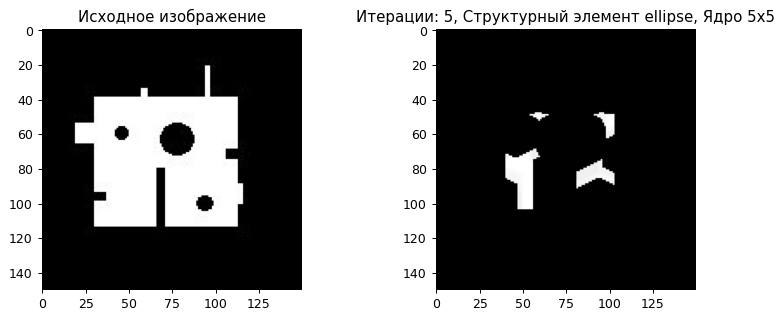

In [11]:
erode(img_copy, 'ellipse')

Структурный элемент прямоугольник

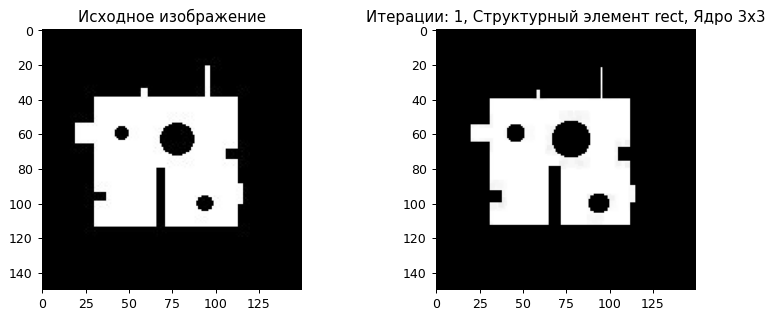

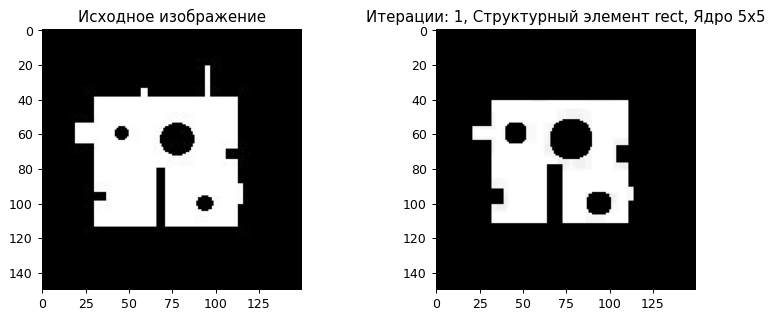

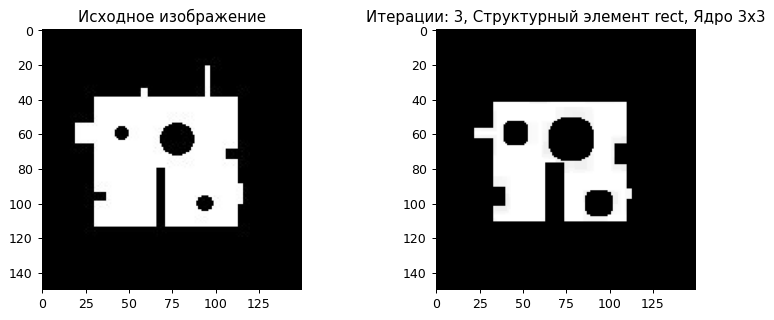

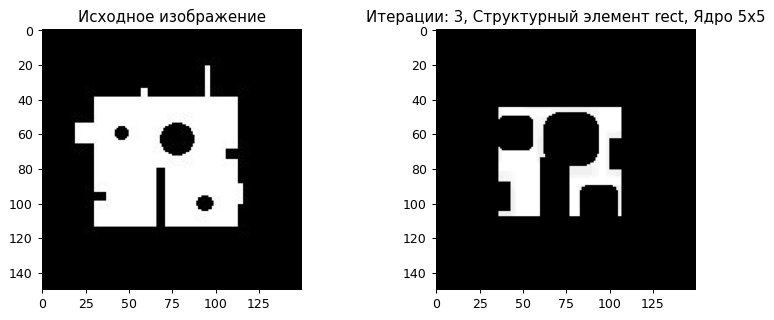

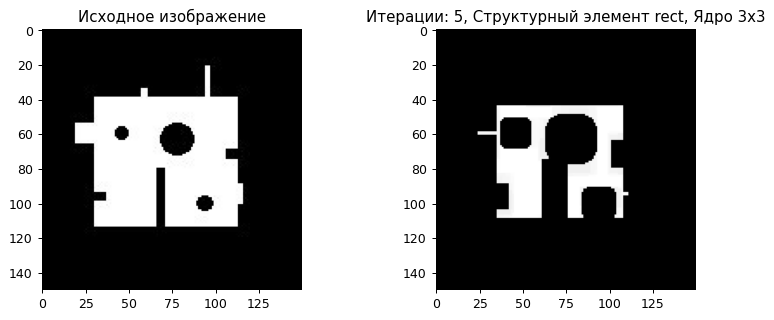

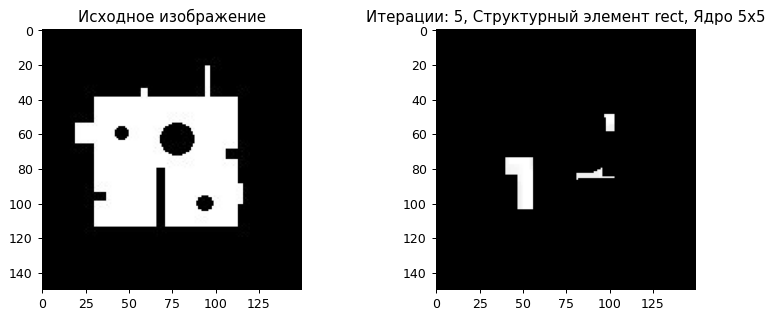

In [12]:
erode(img_copy, 'rect')

Эрозия не смогла разрушить изображение полностью.

##### 2. Попробуйте сравнить результаты операций открытия и закрытия с результатами последовательного применения.

**Результаты открытия и закрытия позволяют нам избавиться от одного из видов зашумления черных или белых пикселей.**

### Открытие

In [15]:
# Операция - открытие
def open(image, type):
    sizes = [3, 5]
    iter = [1, 3, 5]
    for i in sizes:
        for j in iter:
            kernel = structur(type, i)
            open_img = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=j)
            draw_transform1([image, open_img], f'Итерации: {j}, Структурный элемент {type}, Ядро {i}x{i}')

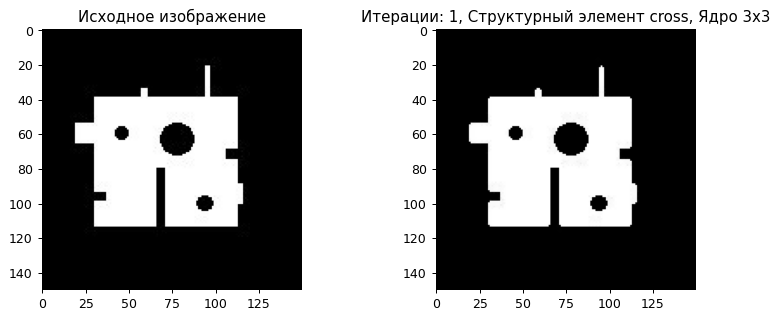

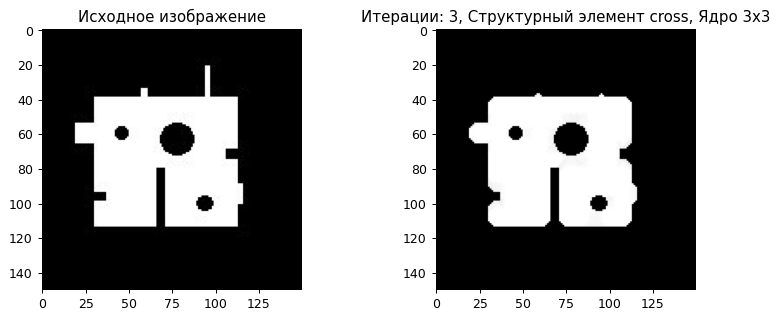

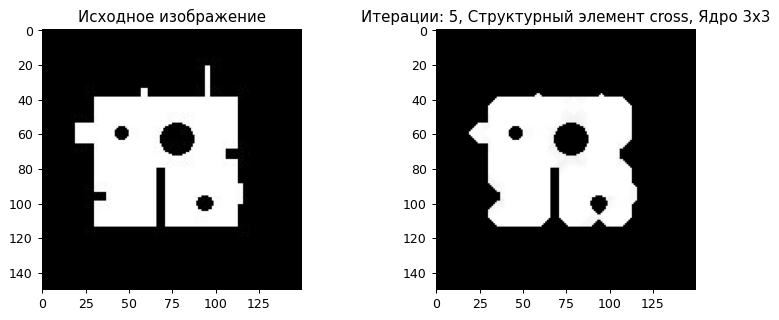

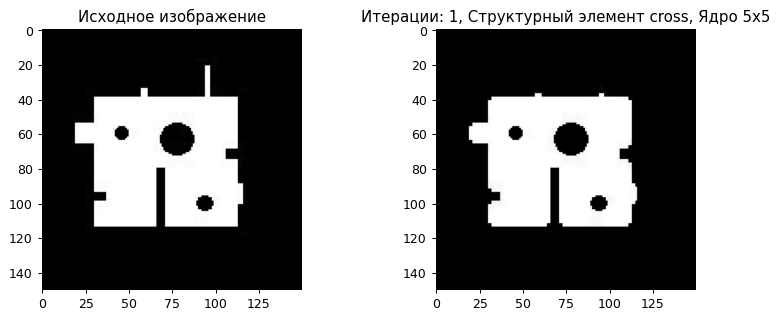

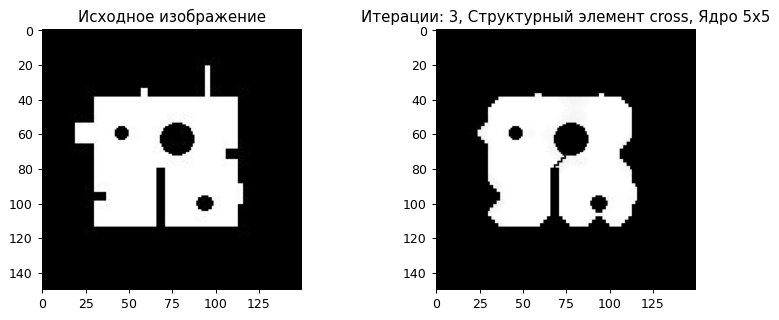

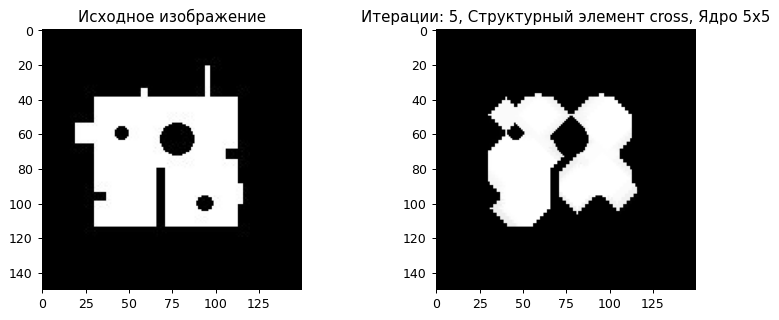

In [16]:
# Структурный элемент крест
open(img_copy, 'cross')

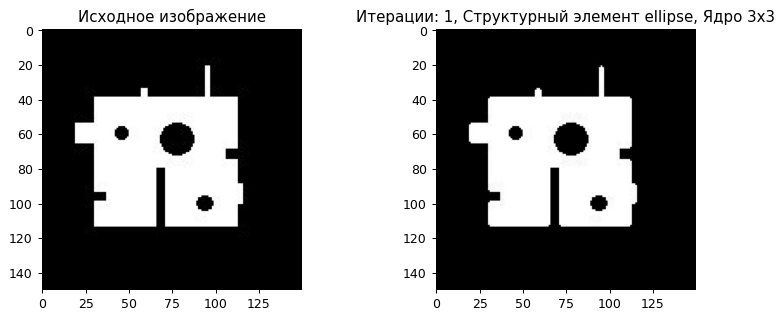

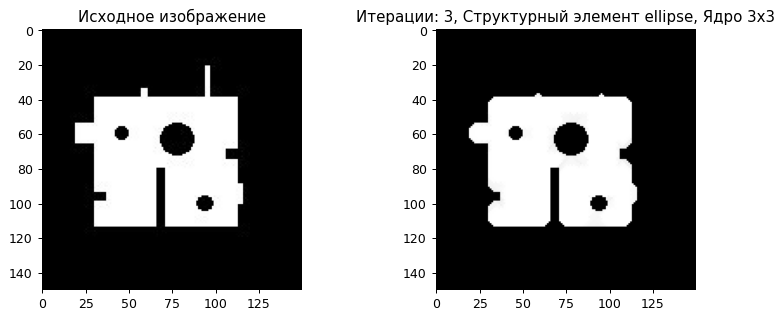

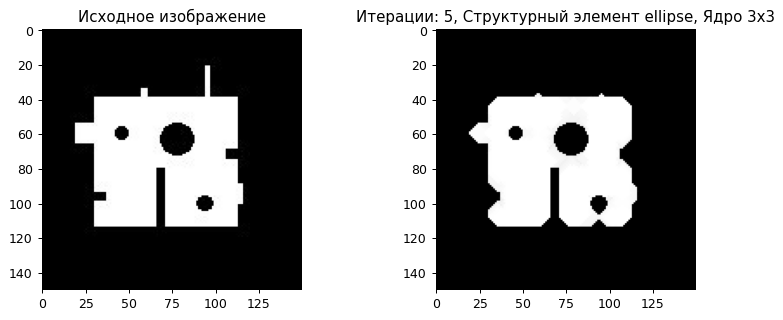

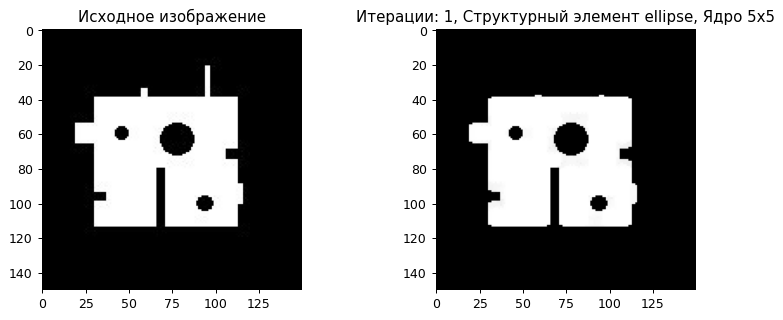

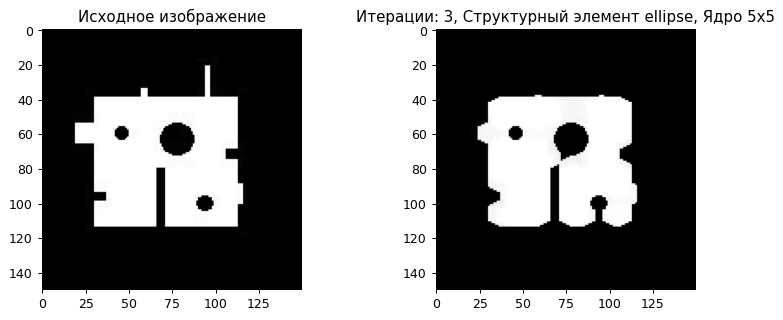

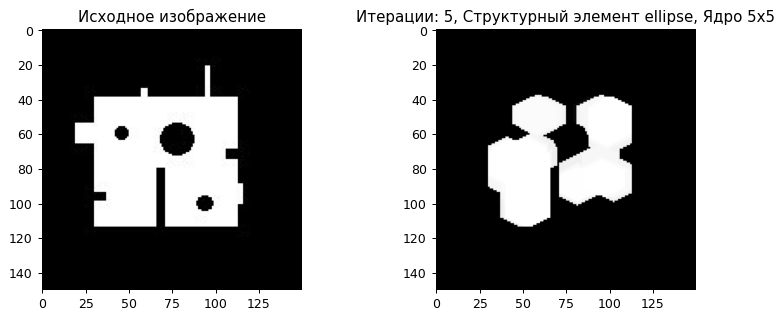

In [19]:
# Структурный элемент эллипс
open(img_copy, 'ellipse')

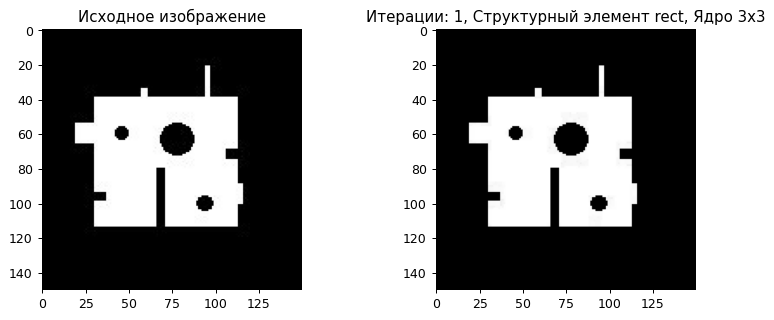

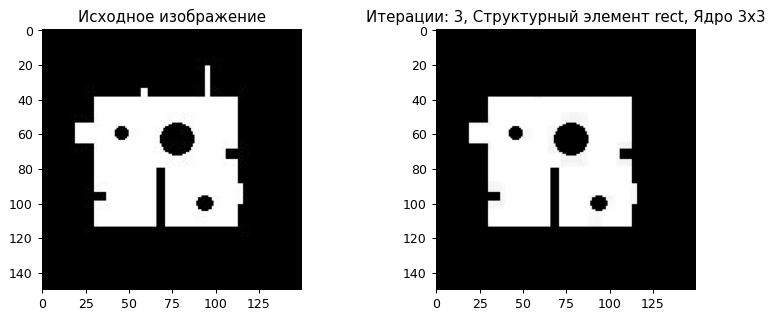

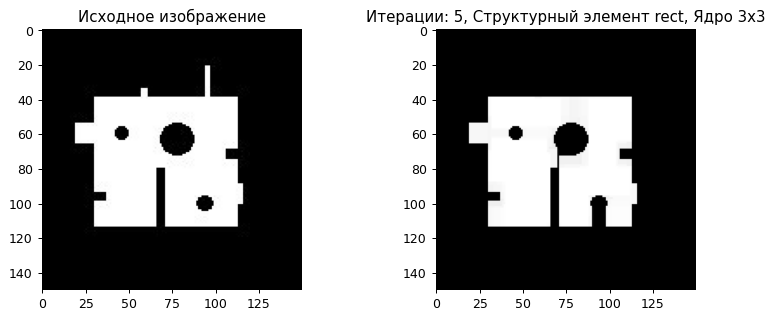

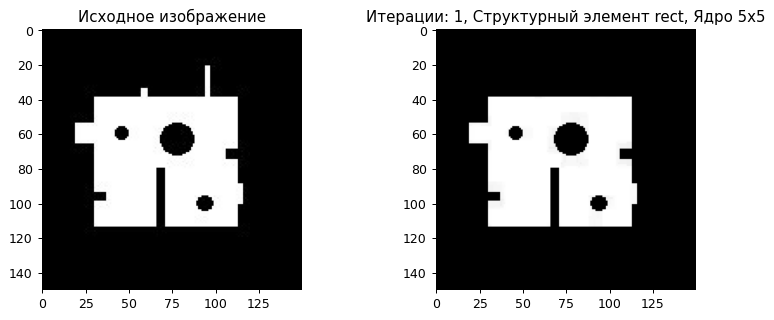

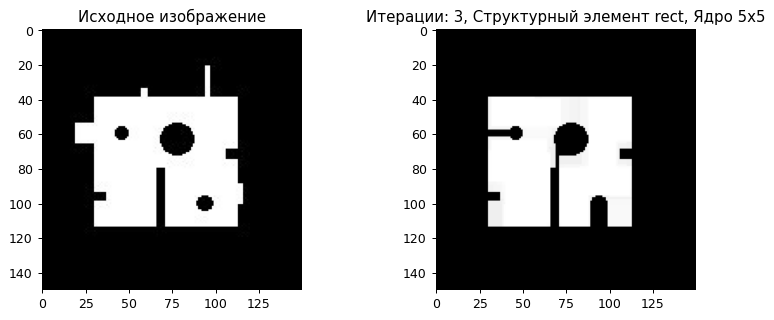

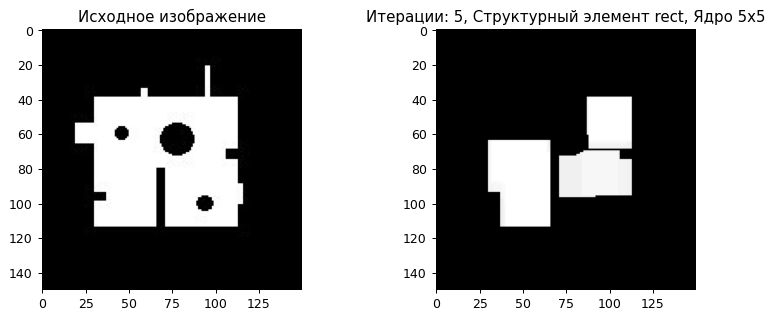

In [20]:
# Структурный элемент прямоугольник
open(img_copy, 'rect')

### Закрытие

In [17]:
# Операция закрытие
def close(image, type):
    sizes = [3, 5]
    iter = [1, 3, 5]
    for i in sizes:
        for j in iter:
            kernel = structur(type, i)
            close_img = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=j)
            draw_transform1([image, close_img], f'Итерации: {j}, Структурный элемент {type}, Ядро {i}x{i}')

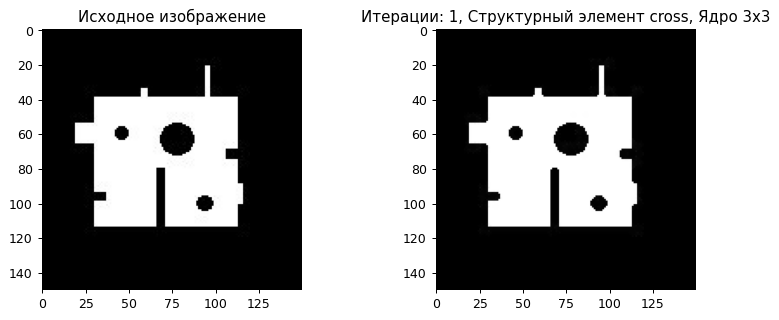

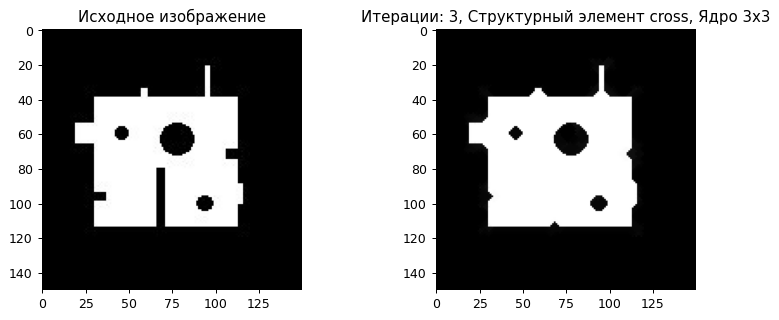

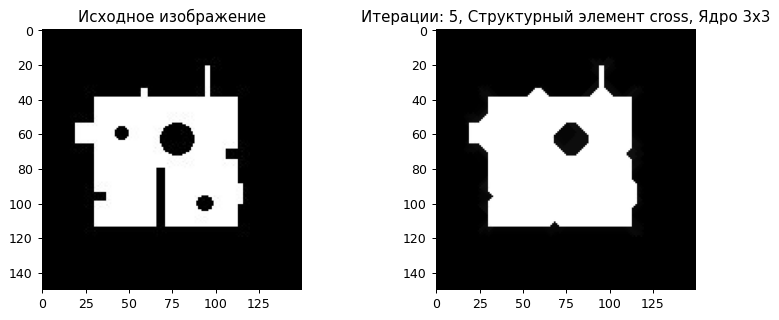

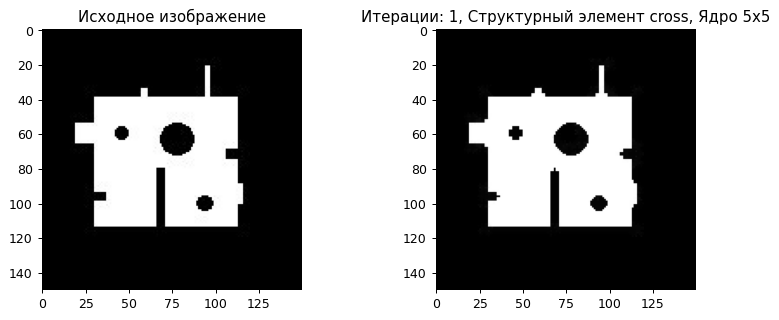

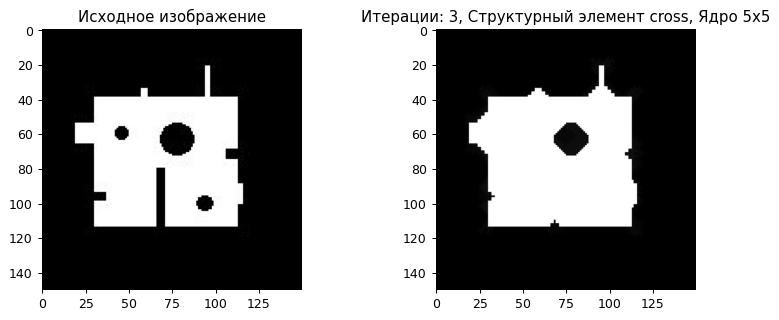

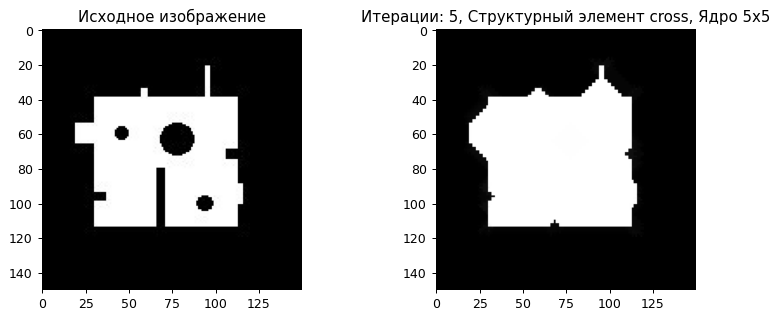

In [18]:
# Структурный элемент крест
close(img_copy, 'cross')

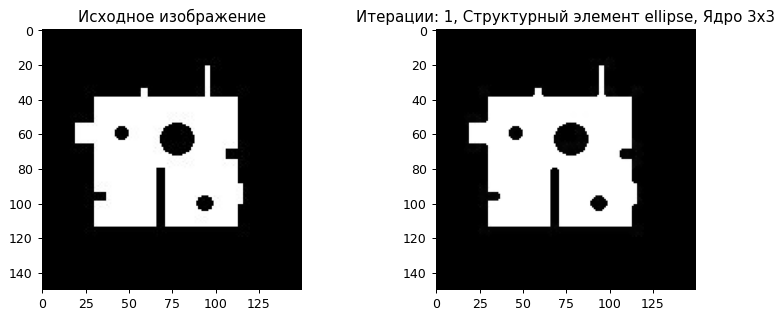

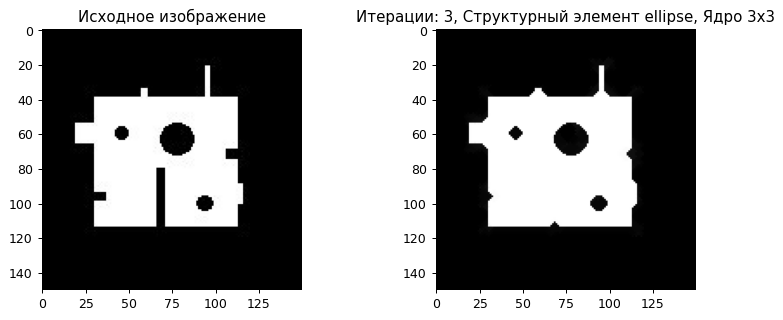

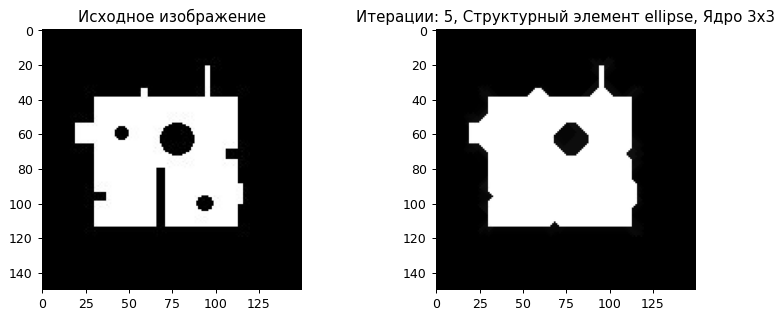

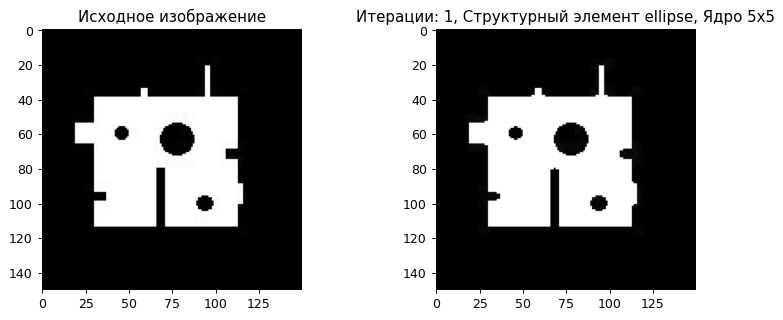

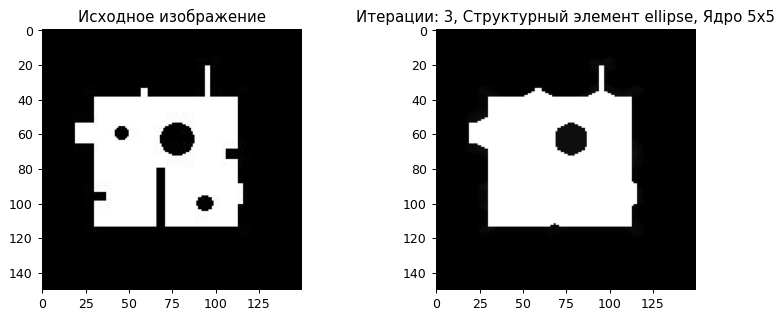

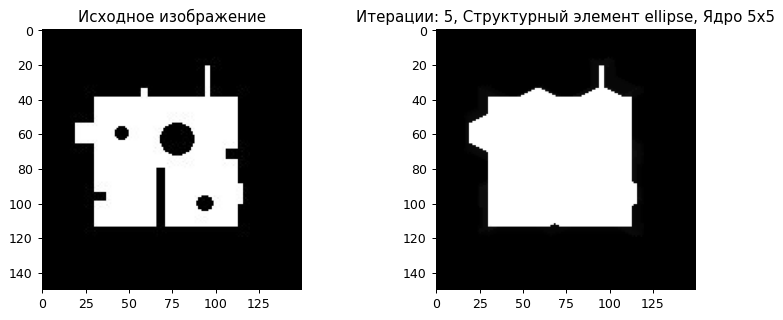

In [21]:
# Структурный элемент эллипс
close(img_copy, 'ellipse')

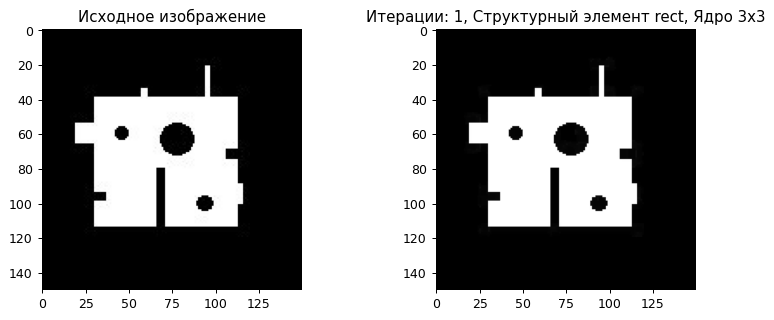

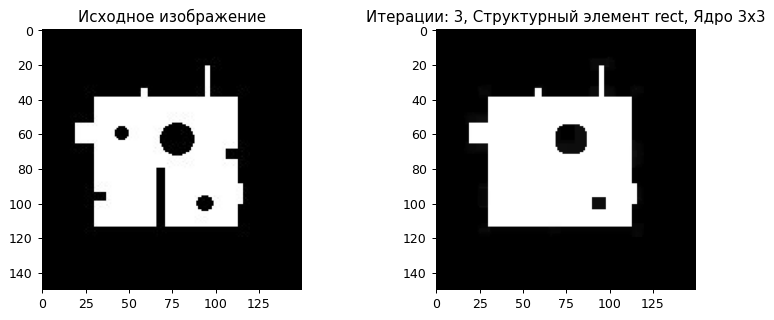

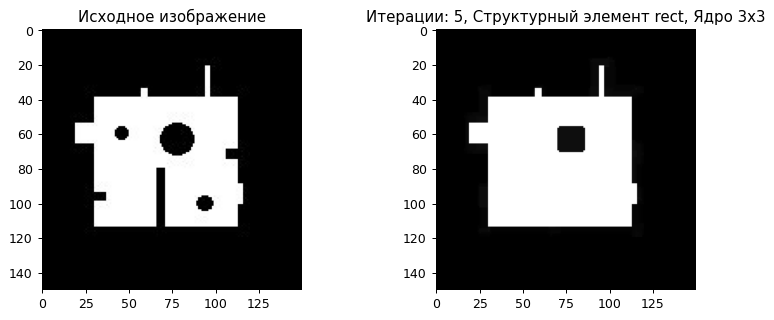

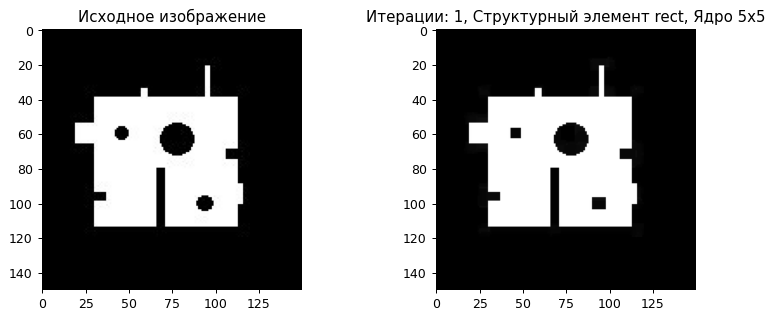

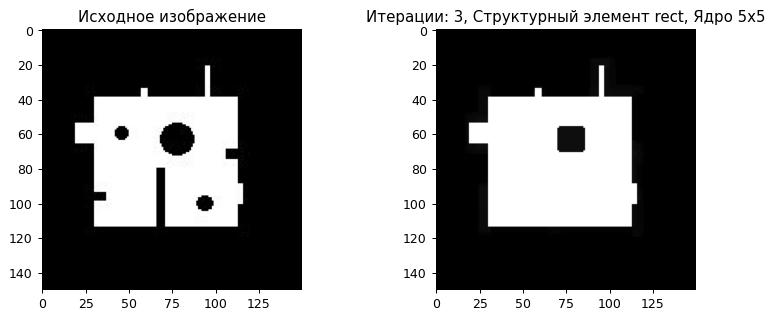

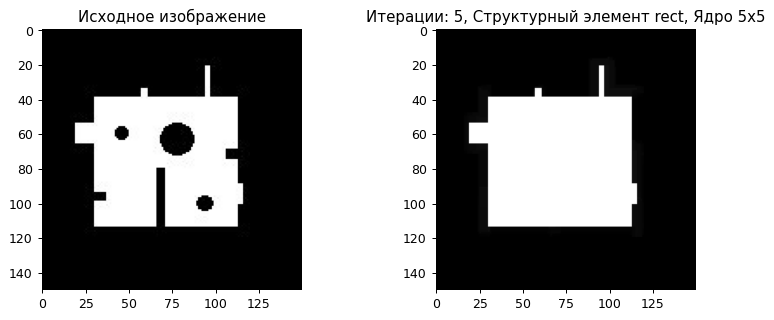

In [22]:
# Структурный элемент прямоугольник
close(img_copy, 'rect')

* Открытие избавляется от вида зашумления - белые пиксели.
* Закрытие избавляется от вида зашумления - черные пиксели.

##### 3. Попробуйте сравнить результаты операции закрытия с результатами последовательного применения дилатации и эрозии: 
close(A,B) = er(dil(A,B),B)

In [23]:
# Операция - закрытие
def er_dil(image, type):
    sizes = [3, 5]
    iter = [1, 3, 5]
    for i in sizes:
        for j in iter:
            kernel = structur(type, i)
            dilate_img = cv2.morphologyEx(image, cv2.MORPH_DILATE, kernel, iterations=j)
            result_img = cv2.morphologyEx(dilate_img, cv2.MORPH_ERODE, kernel, iterations=j)
            draw_transform1([image, result_img], f'Итерации: {j}, Структурный элемент {type}, Ядро {i}x{i}')

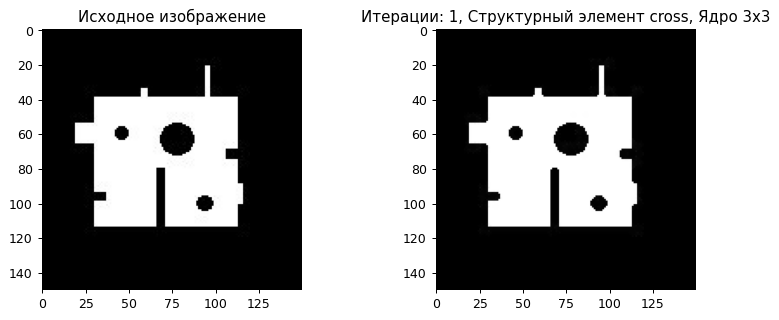

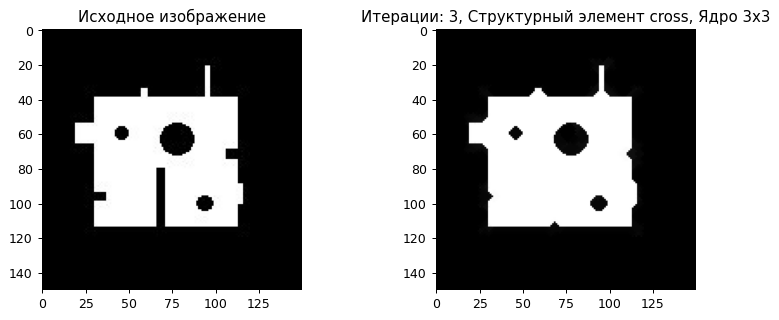

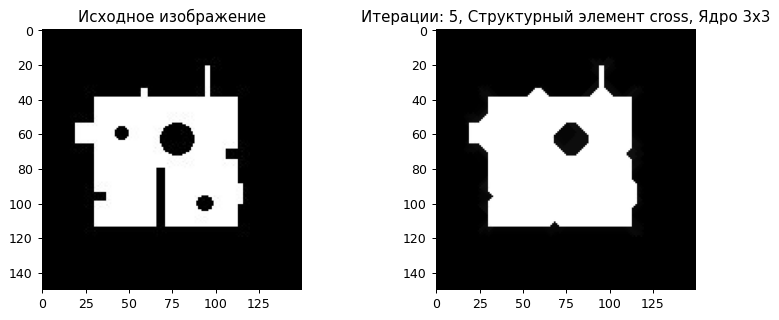

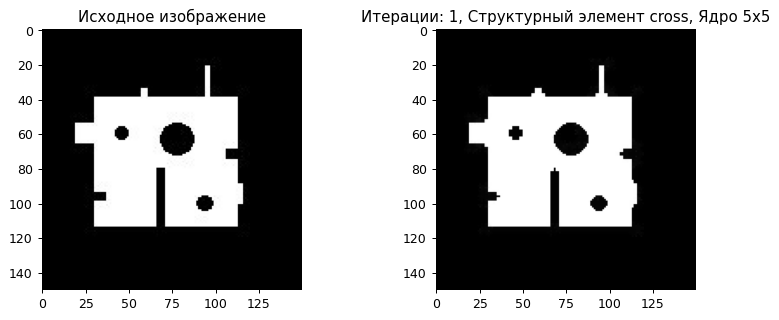

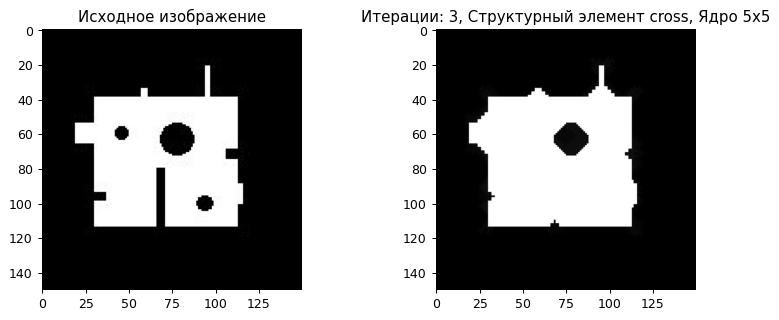

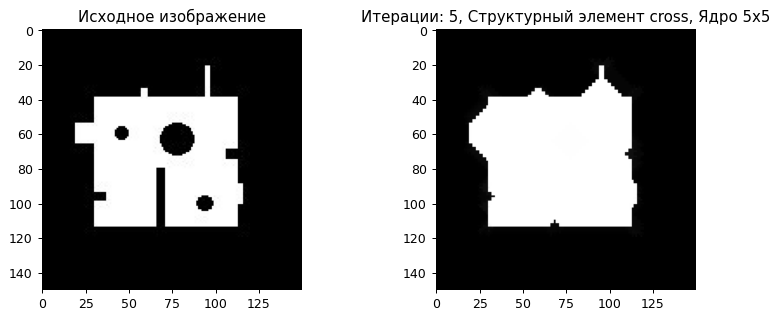

In [24]:
# Структурный элемент крест
er_dil(img_copy, 'cross')

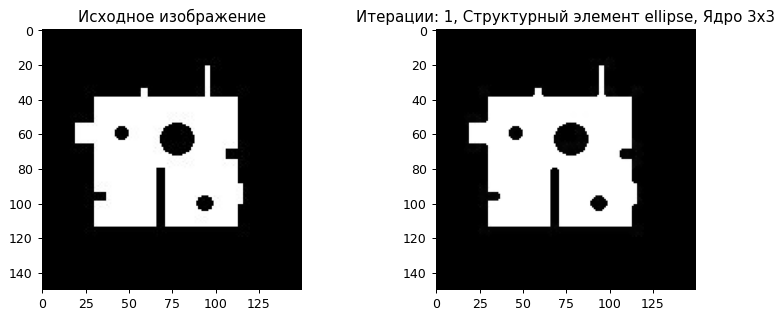

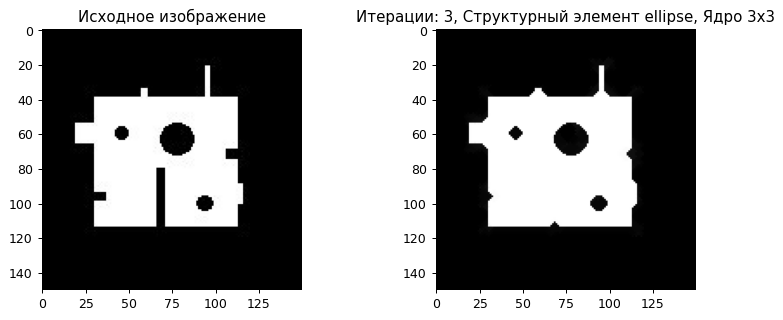

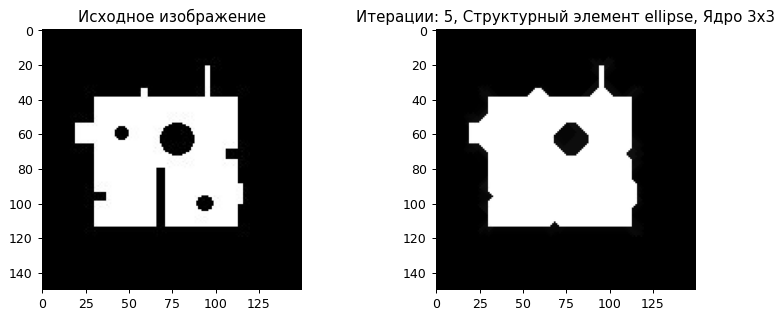

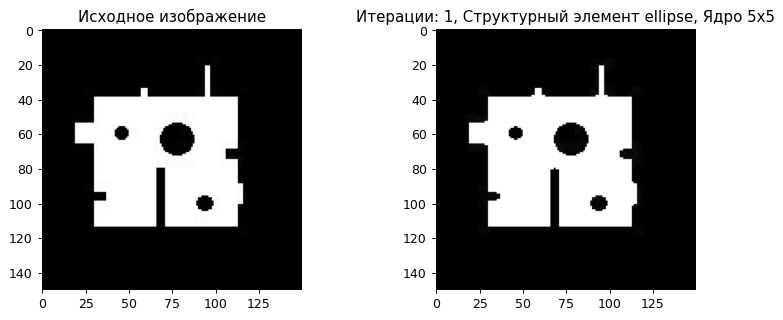

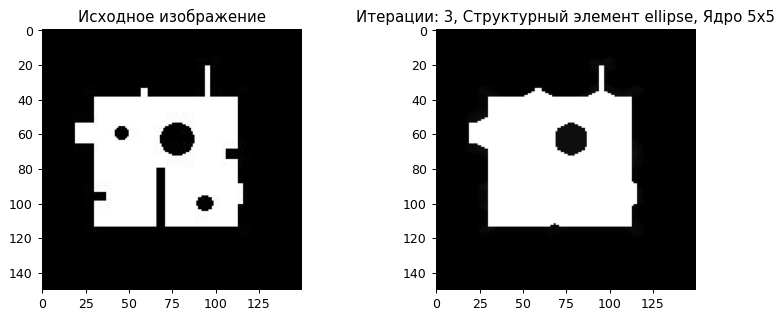

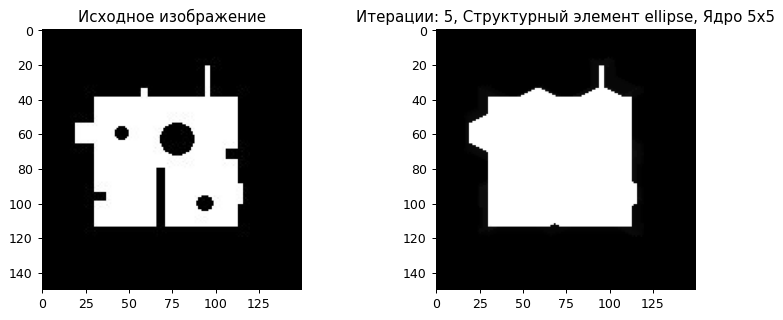

In [25]:
# Структурный элемент эллипс
er_dil(img_copy, 'ellipse')

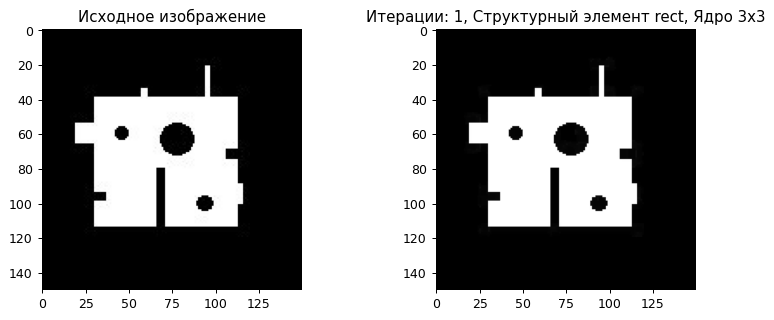

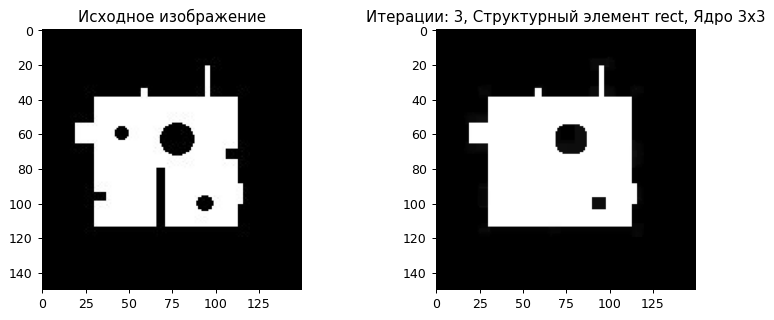

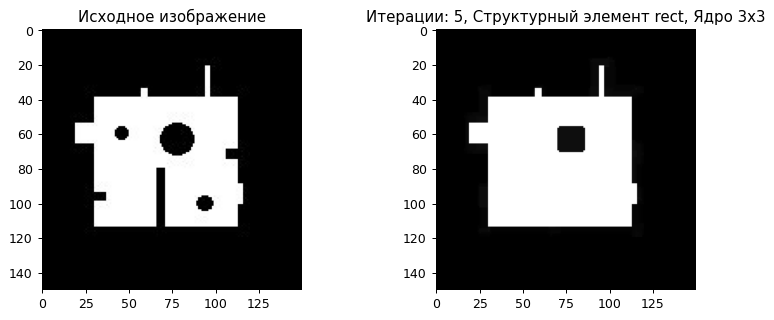

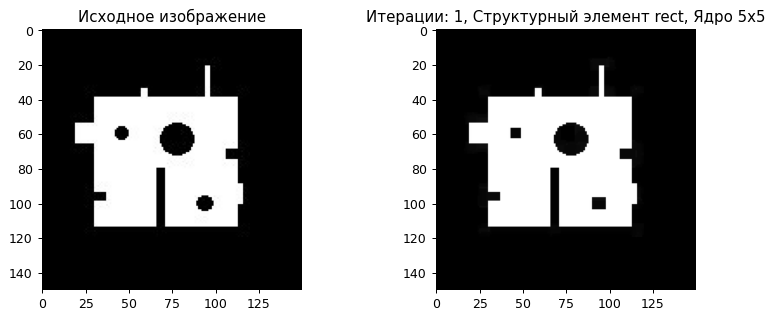

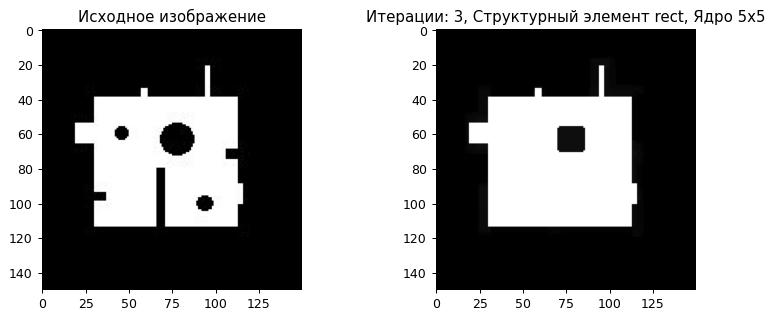

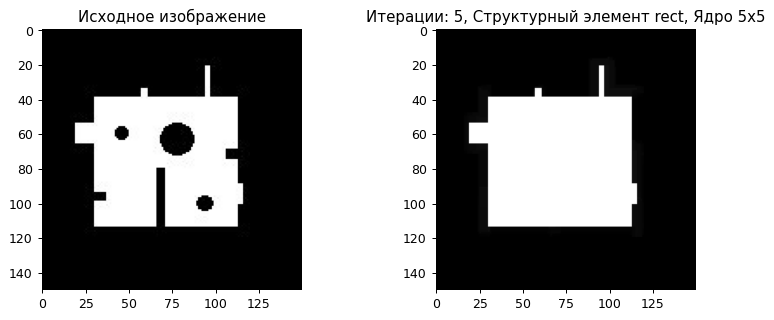

In [26]:
# Структурный элемент прямоугольник
er_dil(img_copy, 'rect')

**Результаты совпадают**

##### 4. Попробуйте сравнить результаты операции открытия с результатами последовательного применения эрозии и дилатации:
open(A,B) = dil(er(A,B),B)

In [27]:
# Операция - открытие
def dil_er(image, type):
    sizes = [3, 5]
    iter = [1, 3, 5]
    for i in sizes:
        for j in iter:
            kernel = structur(type, i)
            erode_img = cv2.morphologyEx(image, cv2.MORPH_ERODE, kernel, iterations=j)
            result_img = cv2.morphologyEx(erode_img, cv2.MORPH_DILATE, kernel, iterations=j)
            draw_transform1([image, result_img], f'Итерации: {j}, Структурный элемент {type}, Ядро {i}x{i}')

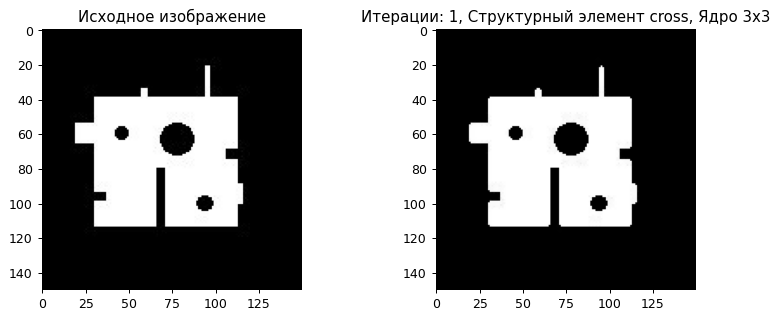

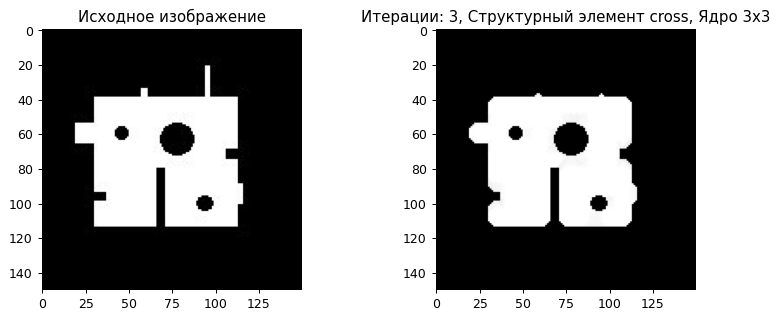

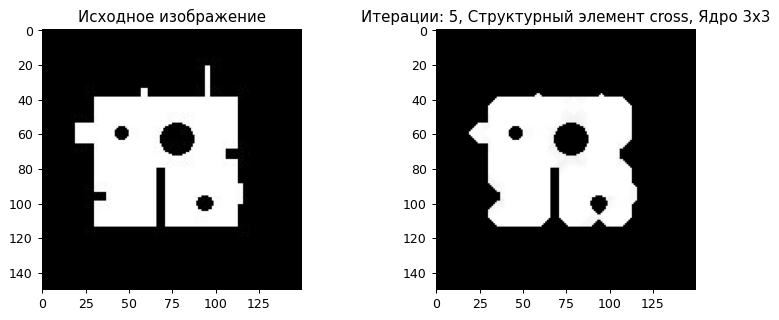

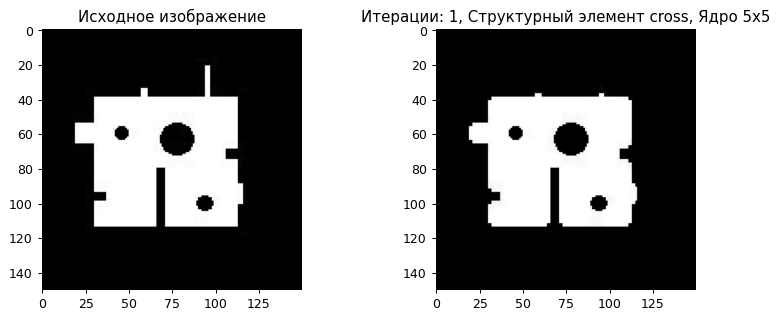

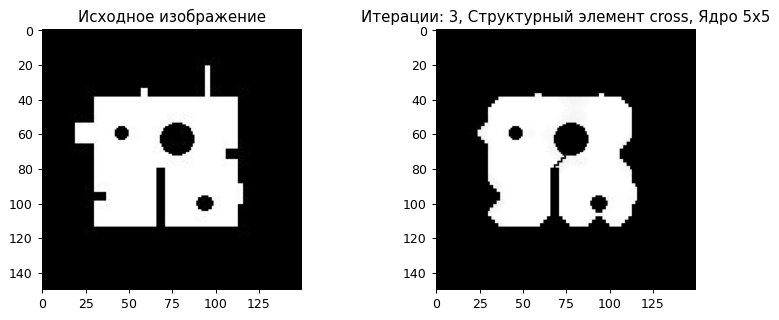

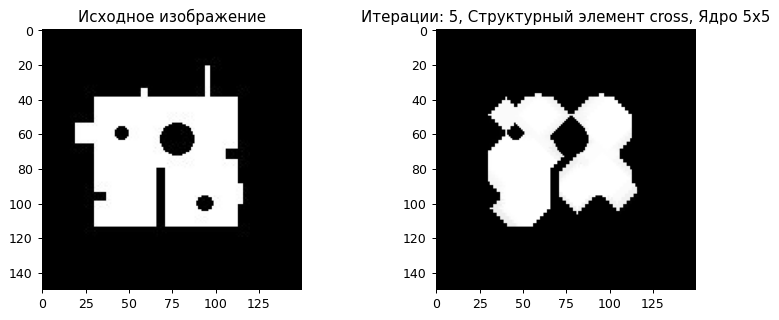

In [28]:
# Структурный элемент крест
dil_er(img_copy, 'cross')

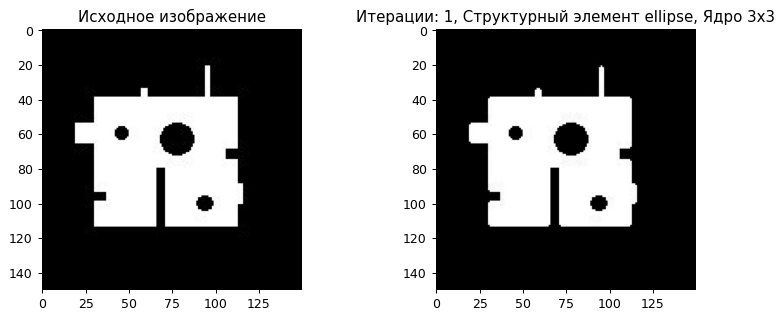

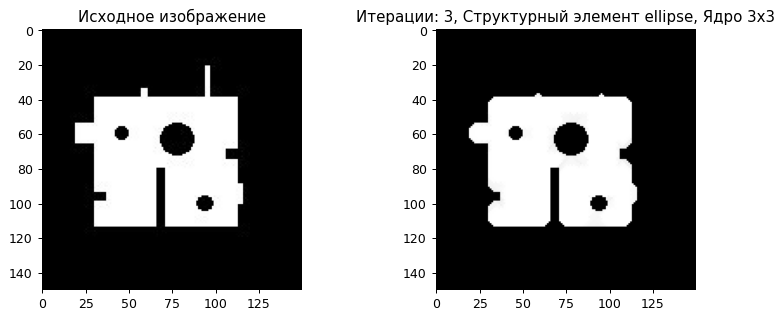

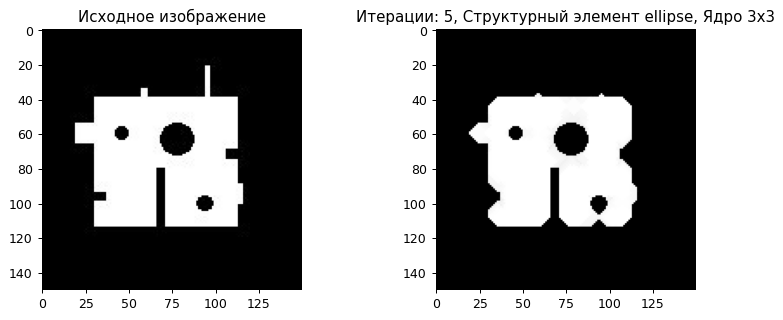

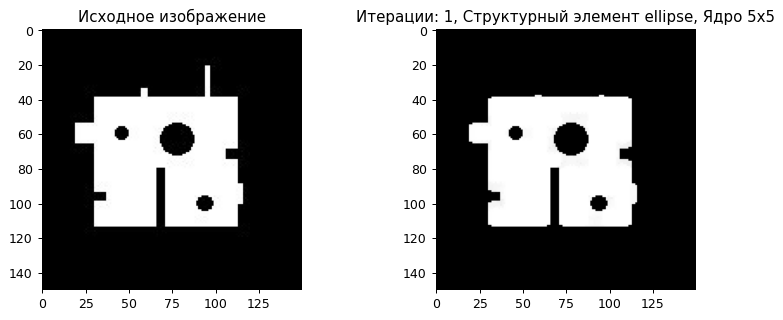

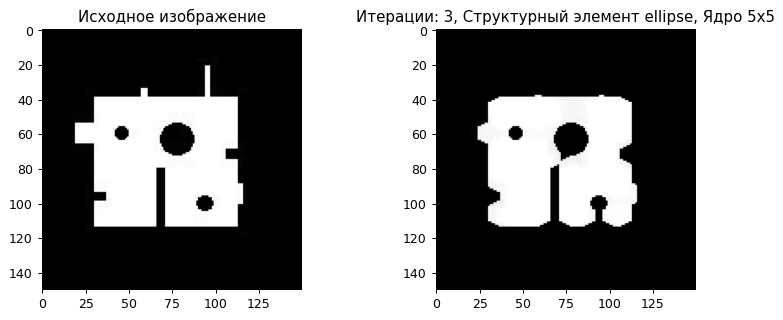

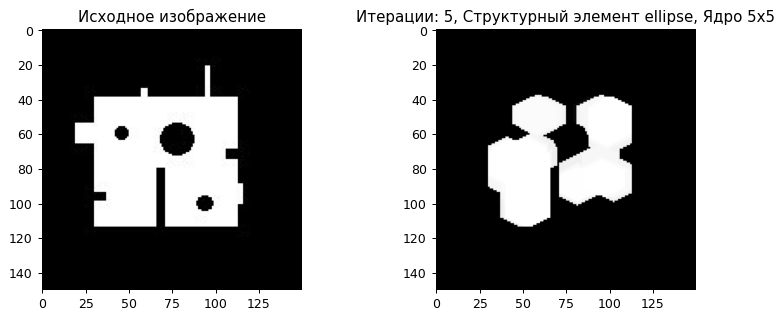

In [29]:
# Структурный элемент эллипс
dil_er(img_copy, 'ellipse')

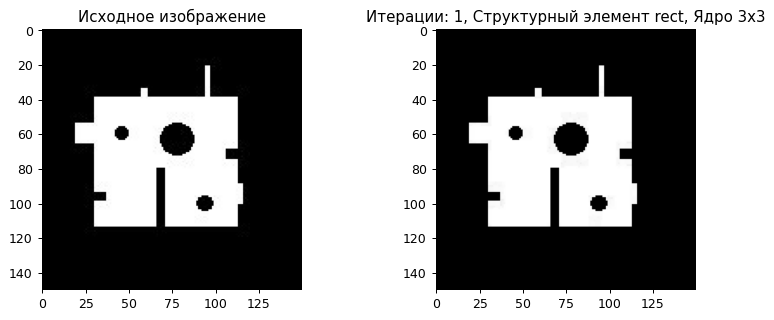

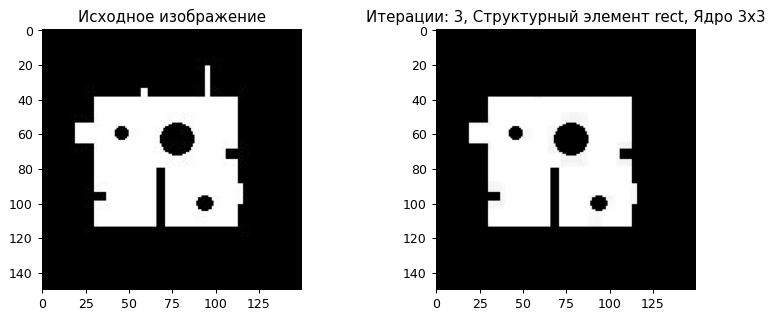

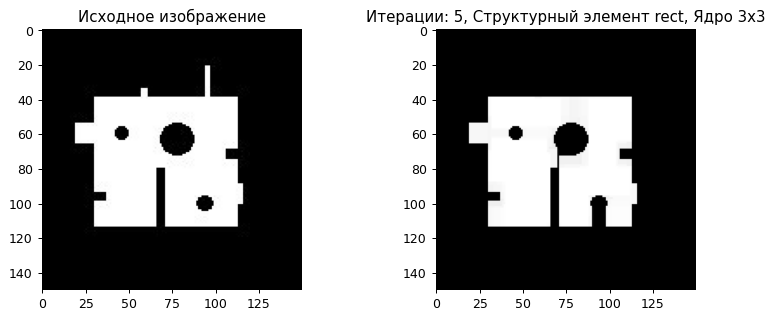

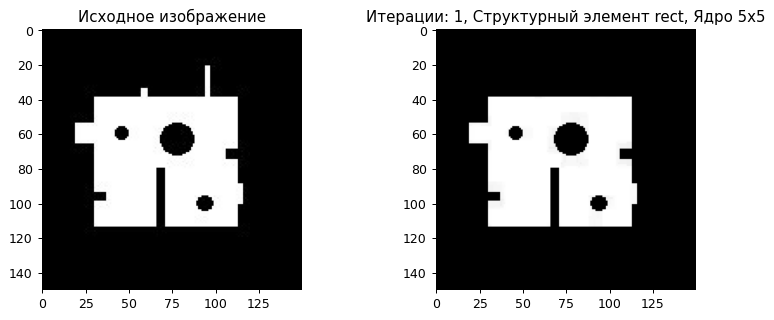

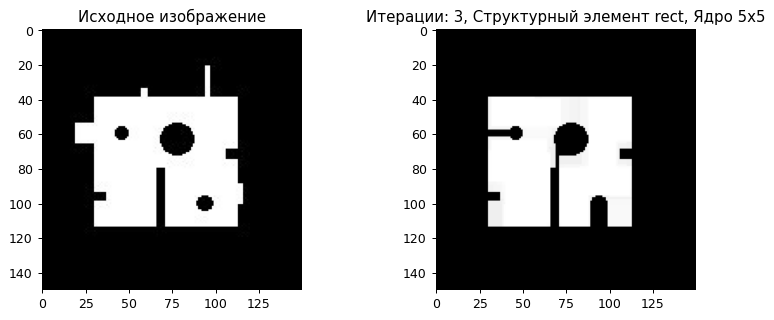

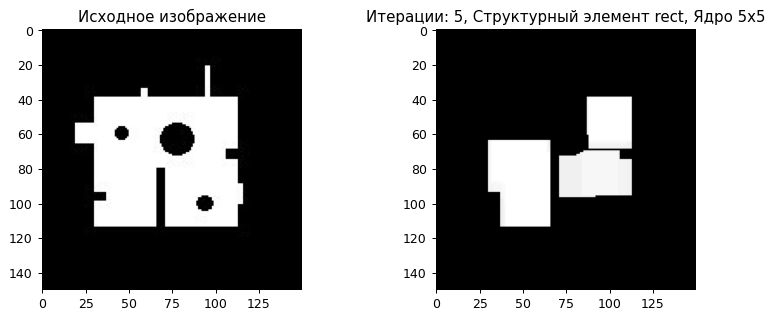

In [30]:
# Структурный элемент прямоугольник
dil_er(img_copy, 'rect')

##### 5. Для всех изображений найдите границы, используя определение:
boundary(A,B) = A – er(A,B)

In [25]:
# Поиск границы объекта
def boundary(image):
    kernel = structur('cross', 3)
    erode_img = cv2.morphologyEx(image, cv2.MORPH_ERODE, kernel, iterations=2)
    result_img = image - erode_img
    draw_transform1([image, result_img], 'Контур')

In [4]:
# Получение изображений
img_path = ['lab5/Blobs 2.jpg', 'lab5/Blobs.jpg', 'lab5/Bri.jpg', 'lab5/Fingerprint.jpg', 'lab5/Morph.jpg', 'lab5/morph2.bmp', 'lab5/morph3.bmp', 'lab5/Truck.jpg']
images = []
for i in img_path:
        img = cv2.imread(i)
        img_copy = img.copy()
        images.append(img_copy)

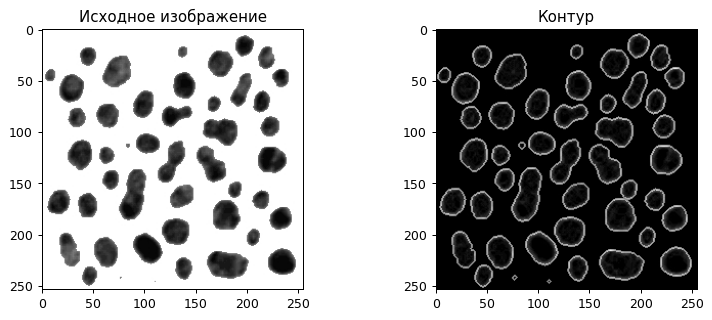

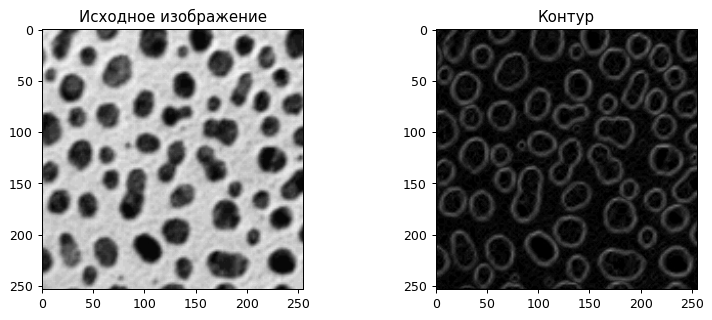

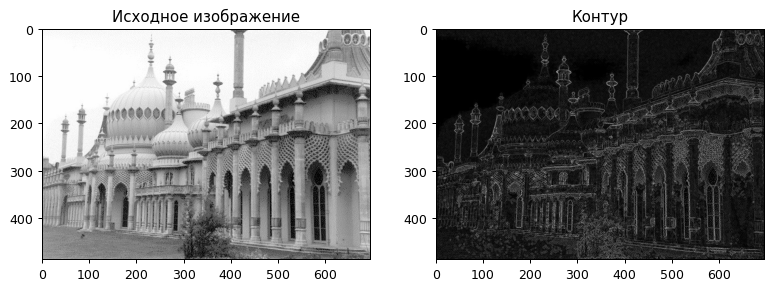

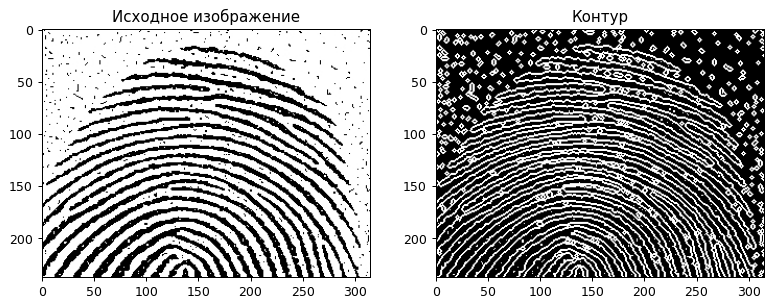

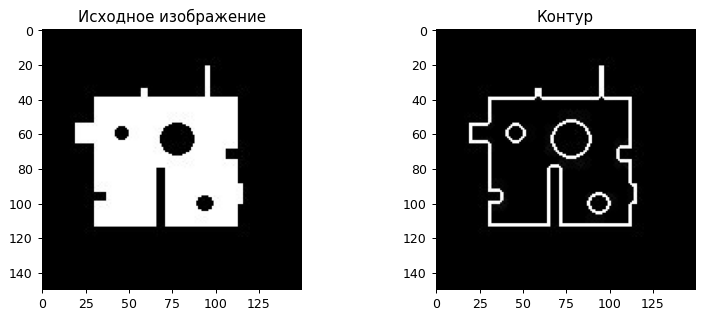

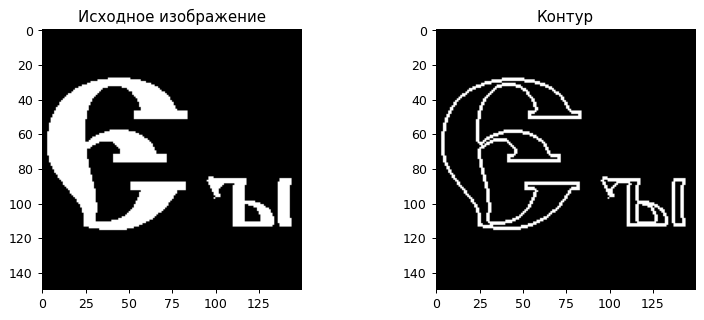

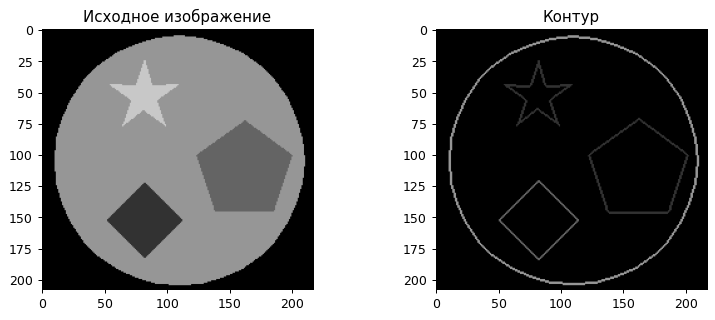

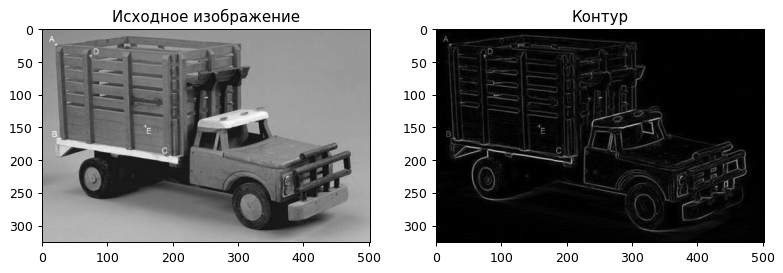

In [31]:
# Выделение контура объектов
for i in images:
    boundary(i)

##### 6. Подберите структурный элемент, который бы наилучшим образом сглаживал углы на изображениях morph.bmp и morph2.bmp.

In [36]:
# Сглаживание углов
def smoothing(image):
    sizes =[3, 5, 7]
    type = ['cross', 'ellipse', 'rect']
    for s in sizes:
        for str in type:
            erode_img = cv2.morphologyEx(image, cv2.MORPH_ERODE, structur(str, s), iterations=1)
            result_img = cv2.morphologyEx(erode_img, cv2.MORPH_DILATE, structur(str, s), iterations=2)
            draw_transform1([image, result_img], f'Сглаживание углов, Структурный элемент {str}, Ядро {s}x{s}')

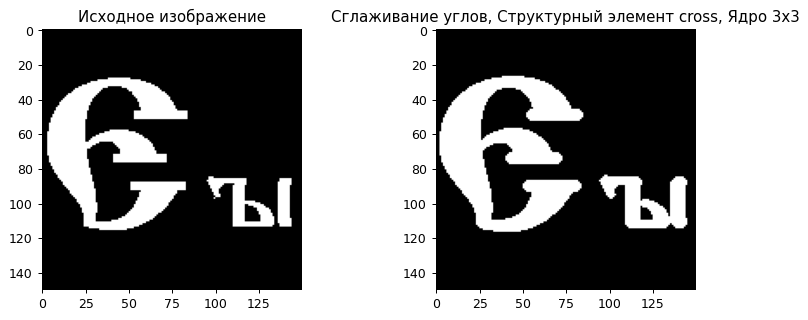

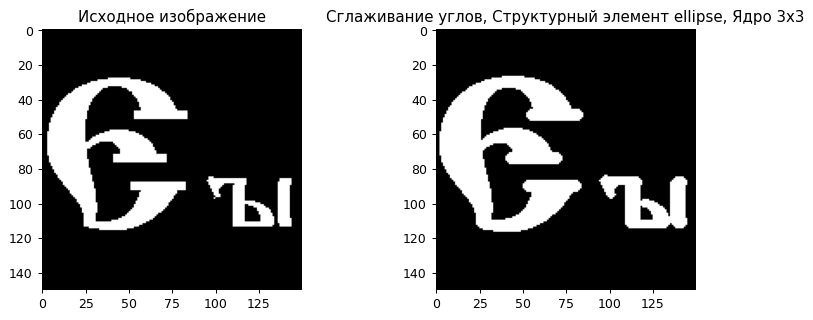

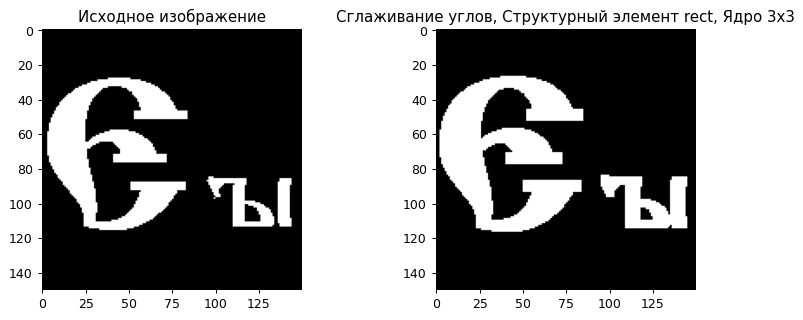

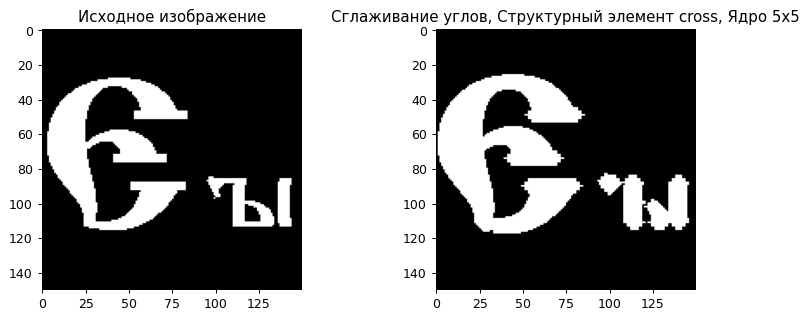

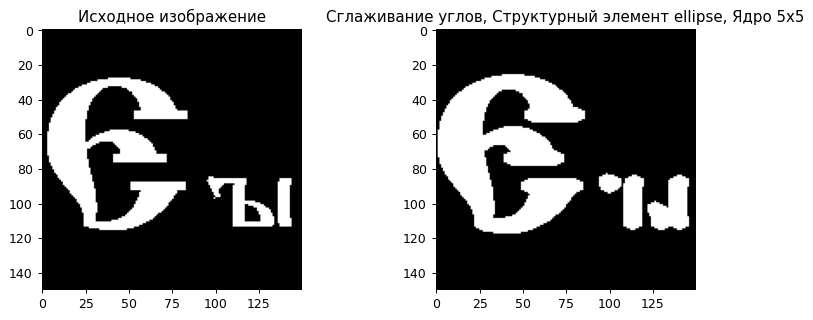

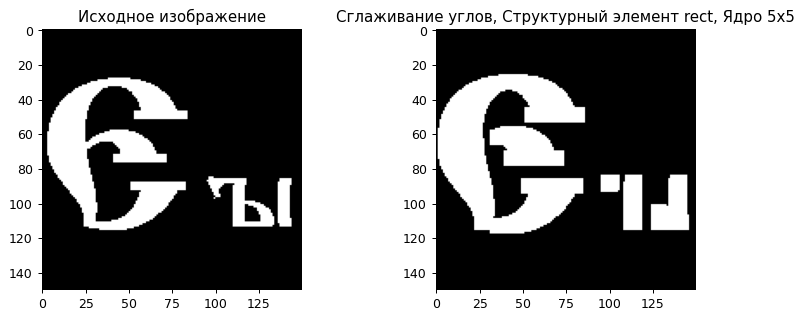

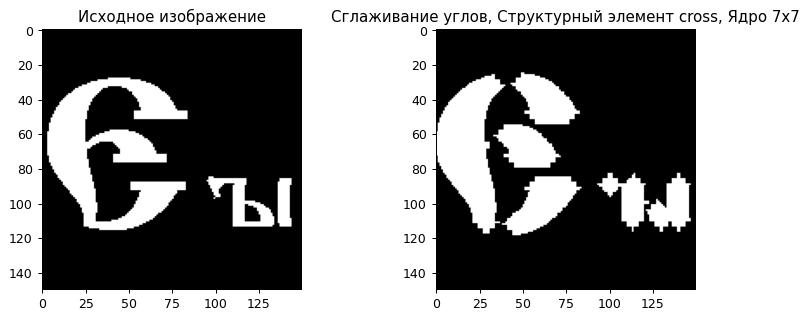

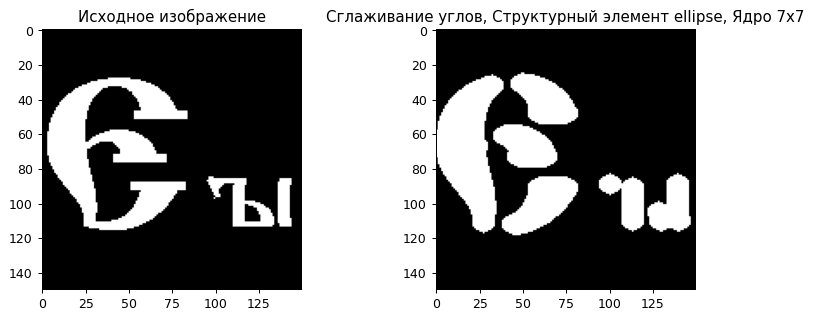

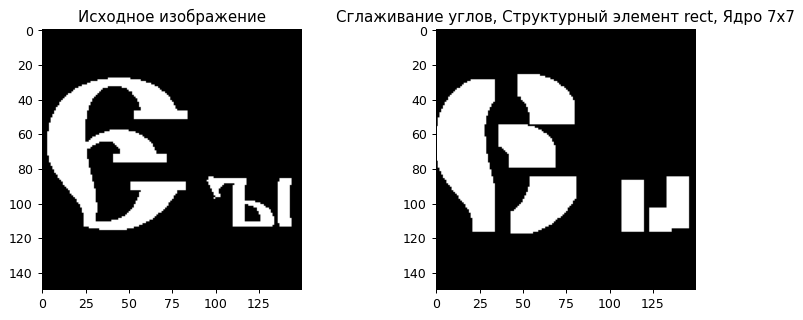

In [37]:
smoothing(images[5])

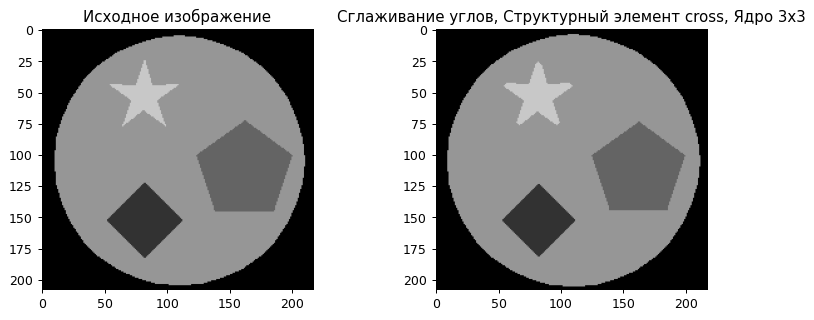

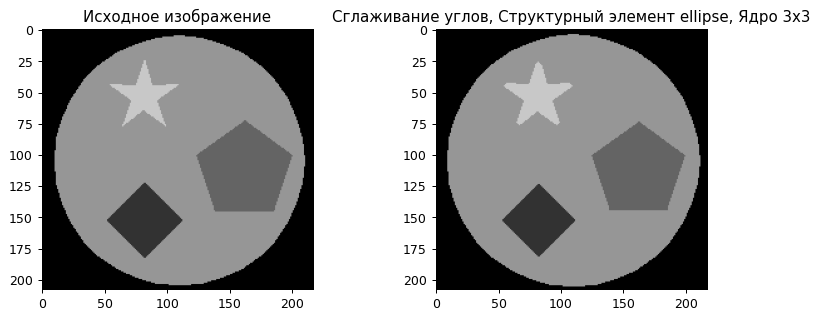

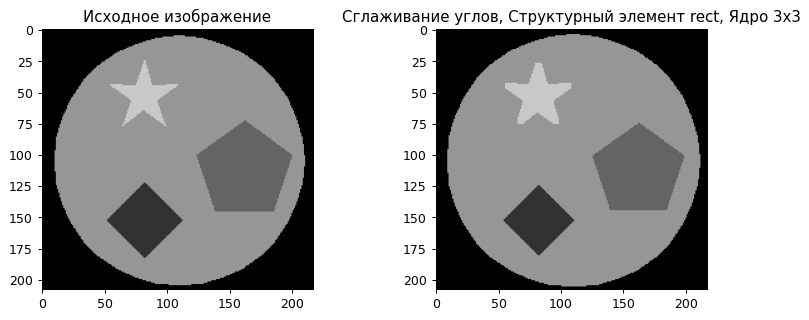

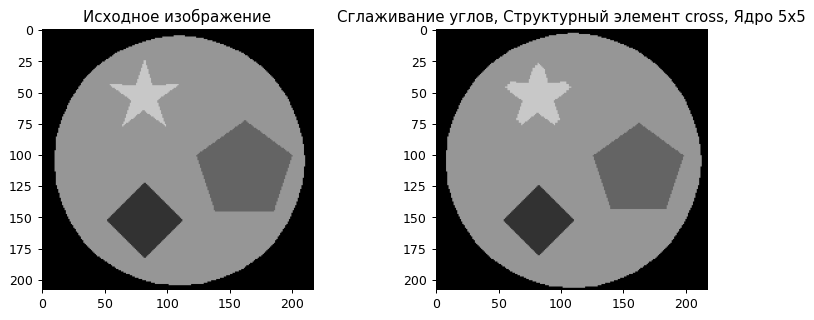

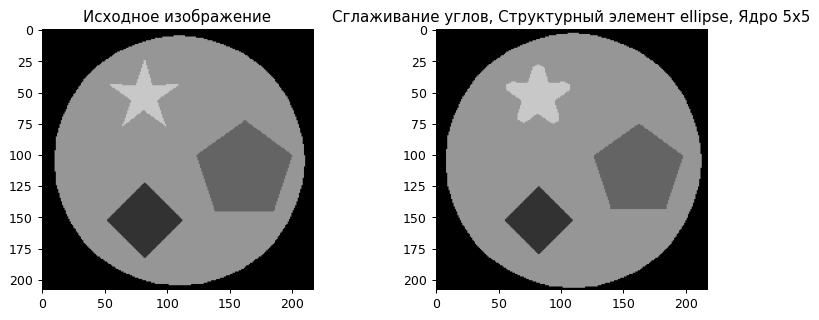

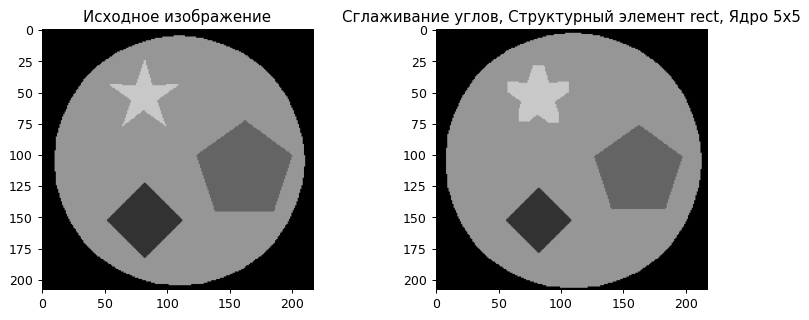

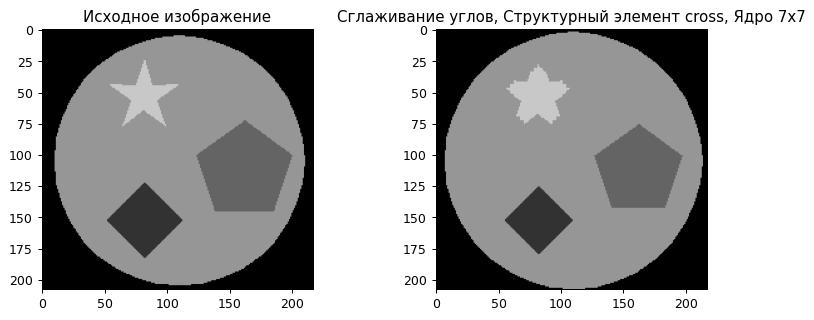

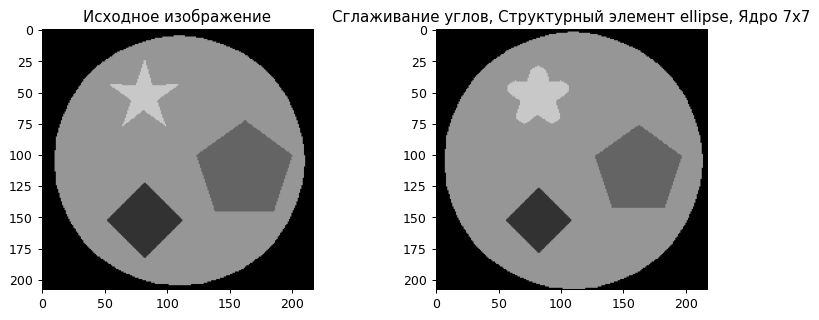

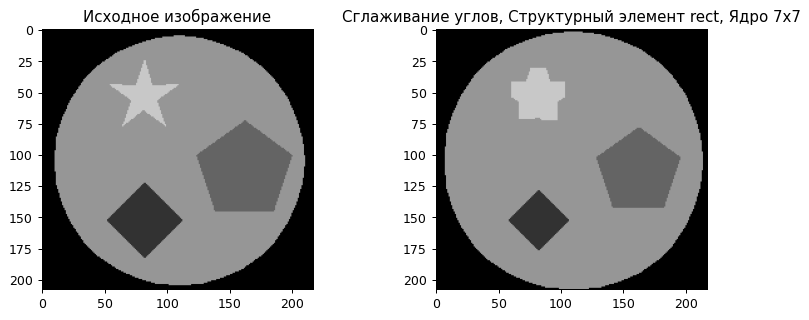

In [38]:
smoothing(images[6])

##### 7. С помощью порога бинаризуйте изображение morph3.bmp. Найдите контуры каждого элемента по отдельности, (используйте для этого разное значение порога). Выделите несколько объектов на изображении, найдите их контуры.

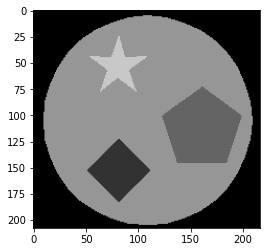

In [133]:
# Исходное изображение
img_copy = images[6].copy()
plt.imshow(img_copy)
plt.show()

In [134]:
# Контуры всех объектов
gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
th = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 5, 5)

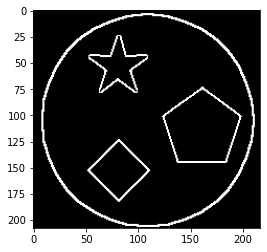

In [135]:
# Контуры всех изображений
plt.imshow(th, 'gray')
plt.show()

In [136]:
# Отрисовка контурв
def draw_contour(contours):
    image_contours = np.zeros_like(gray)
    listC = contours[::2]
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    for i, contour in enumerate(listC):
        cv2.drawContours(image_contours, [contour], -1, (255, 255, 255), 2)
        axs[i].imshow(image_contours, cmap='gray')
        image_contours = np.zeros_like(gray)
    plt.show()

In [137]:
# Выделение контура
contours, _ = cv2.findContours(th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

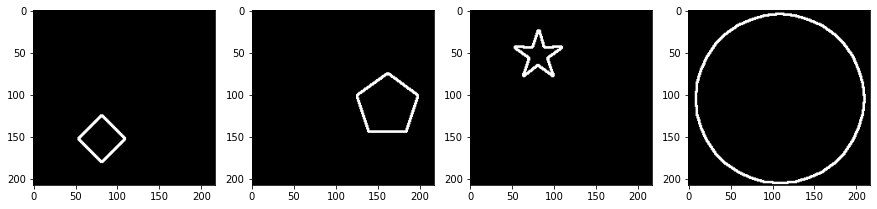

In [138]:
draw_contour(contours)

In [139]:
# Нахождение контура каждого объекта по отдельности
thresholds = [0, 50, 100, 150]
results = []

for i in thresholds:
    threshold_b = cv2.threshold(img_copy, i, 255, cv2.THRESH_BINARY)[1]
    
    results.append(threshold_b)

Figure = [results[0], results[1]-results[2], results[0]-results[1]-results[2], results[3]]

several = [results[0]-results[2]]

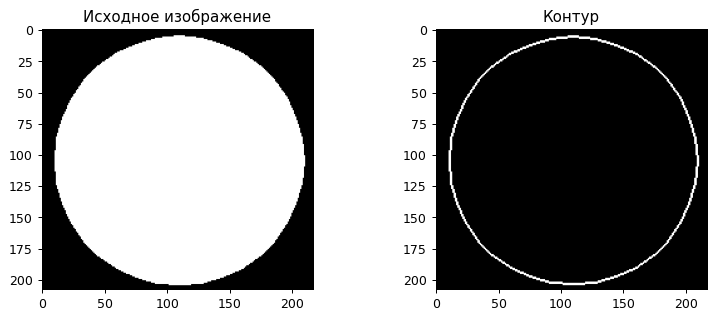

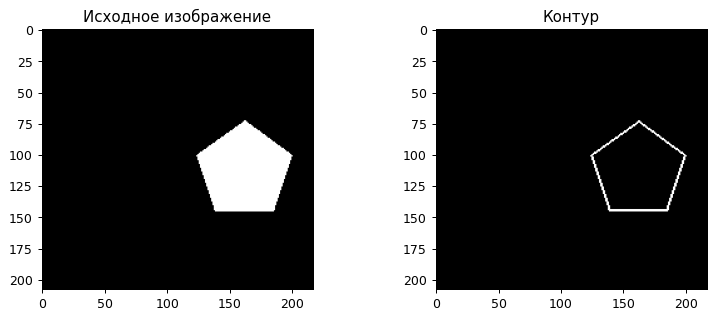

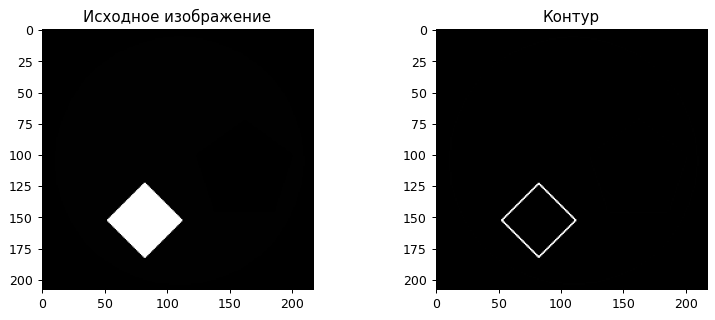

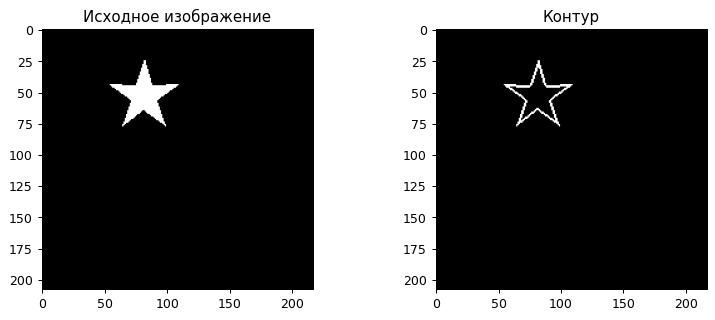

In [140]:
# Контур
for i in Figure:
    boundary(i)

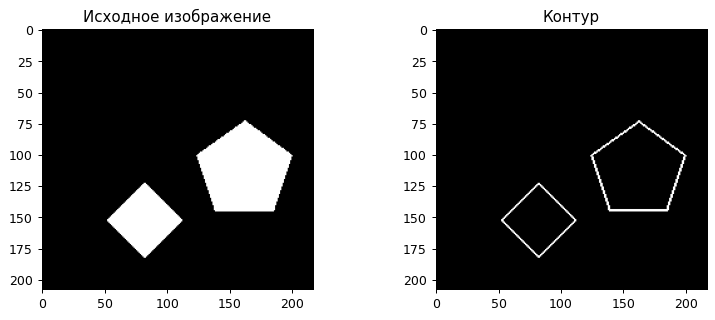

In [141]:
# Несколько объектов
for i in several:
    boundary(i)

##### 8. Откройте изображение Fingerprint.jpg. Разработайте и реализуйте последовательность морфологических операций для качественного выделения отпечатка пальца из изображения.

In [40]:
names = ['Исходное изображение', 'Бинарное изображение', 'Эрозия', 'Дилатация']
Fingerprint = []
# Оригинальное изображение
img_fprint = images[3].copy()
Fingerprint.append(img_fprint)
# Бинаризация
bin_img = cv2.threshold(img_fprint, 127, 255, cv2.THRESH_BINARY_INV)[1]
Fingerprint.append(bin_img)
# Эрозия
erode_img = cv2.morphologyEx(bin_img, cv2.MORPH_ERODE, structur('ellipse', 3), iterations=1)
Fingerprint.append(erode_img)
# Дилатация
dilate_img = cv2.morphologyEx(erode_img, cv2.MORPH_DILATE, structur('ellipse', 3), iterations=1)
Fingerprint.append(dilate_img)

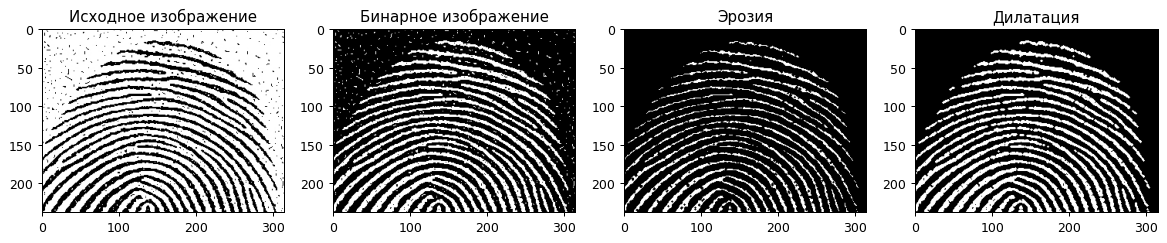

In [41]:
# Отображение результата
plt.figure(figsize=(16,13), dpi=90)
for i in range(len(names)):
    plt.subplot2grid((1,4), (0,i))
    plt.imshow(Fingerprint[i])
    plt.title(names[i])
plt.show()